In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Batting Dataset 

In [74]:
batting = pd.read_csv('ODI data.csv')
batting.head()

Unnamed: 0                       Player       Span  Mat Inns  NO   Runs  \
0           0         SR Tendulkar (INDIA)  1989-2012  463  452  41  18426   
1           1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   
2           2         RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   
3           3      ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   
4           4   DPMD Jayawardene (Asia/SL)  1998-2015  448  418  39  12650   

     HS    Ave     BF     SR 100  50   0  Unnamed: 13  
0  200*  44.83  21367  86.23  49  96  20          NaN  
1   169  41.98  18048  78.86  25  93  15          NaN  
2   164  42.03  17046  80.39  30  82  20          NaN  
3   189  32.36  14725   91.2  28  68  34          NaN  
4   144  33.37  16020  78.96  19  77  28          NaN

In [75]:
batting.dtypes

Unnamed: 0       int64
Player          object
Span            object
Mat              int64
Inns            object
NO              object
Runs            object
HS              object
Ave             object
BF              object
SR              object
100             object
50              object
0               object
Unnamed: 13    float64
dtype: object

In [76]:
batting['Inns'] = pd.to_numeric(batting['Inns'], errors='coerce')
batting['Mat'] = pd.to_numeric(batting['Mat'], errors='coerce')
batting['NO'] = pd.to_numeric(batting['NO'], errors='coerce')
batting['Runs'] = pd.to_numeric(batting['Runs'], errors='coerce')
batting['HS'] = pd.to_numeric(batting['HS'], errors='coerce')
batting['Ave'] = pd.to_numeric(batting['Ave'], errors='coerce')
batting['BF'] = pd.to_numeric(batting['BF'], errors='coerce')
batting['SR'] = pd.to_numeric(batting['SR'], errors='coerce')
batting['50'] = pd.to_numeric(batting['50'], errors='coerce')
batting['100'] = pd.to_numeric(batting['100'], errors='coerce')
batting['0'] = pd.to_numeric(batting['0'], errors='coerce')

In [77]:
batting = batting.replace('-', 0)
batting = batting.replace('- ', 0)
batting = batting.replace(' -', 0)
batting = batting.replace(' - ', 0)

In [78]:
batting[['Start Year','End Year']] = batting.Span.str.split("-",expand=True) 

In [79]:
batting.drop(columns=['Unnamed: 0'], inplace=True)

In [80]:
batting.drop(columns=['Span'], inplace=True)

In [81]:
batting.drop(columns=['Unnamed: 13'], inplace=True)

In [82]:
batting.isnull().sum()

Player          0
Mat             0
Inns           10
NO             10
Runs           10
HS            795
Ave           130
BF             10
SR             19
100            10
50             10
0              10
Start Year      0
End Year        0
dtype: int64

In [13]:
batting_data.dtypes

Player     object
Mat         int64
Inns      float64
NO        float64
Runs      float64
HS        float64
Ave       float64
BF        float64
SR        float64
100       float64
50        float64
0         float64
Strt       object
End        object
dtype: object

In [85]:
batting = batting.dropna()

In [86]:
batting_data.isnull().sum()

Player     0
Mat        0
Inns       0
NO         0
Runs       0
HS         0
Ave        0
BF         0
SR         0
100        0
50         0
0          0
Country    0
dtype: int64

In [88]:
batting.Player

1       KC Sangakkara (Asia/ICC/SL)
2              RT Ponting (AUS/ICC)
3           ST Jayasuriya (Asia/SL)
4        DPMD Jayawardene (Asia/SL)
6                   V Kohli (INDIA)
                   ...             
2484                 GS Sobers (WI)
2485             Tanvir Mehdi (PAK)
2487                R Walters (NAM)
2488             CM Willoughby (SA)
2489          Zakir Hossain (BDESH)
Name: Player, Length: 1704, dtype: object

In [89]:
batting.Player.str.split(" ")
batting['Country'] = batting.Player.str.split(" ").str.get(-1)
batting['Player Name'] = batting.Player.str.split(" ").str.get(1)

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2125214459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Country'] = batting.Player.str.split(" ").str.get(-1)
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2125214459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Player Name'] = batting.Player.str.split(" ").str.get(1)


In [90]:
batting['Player'] = batting['Player Name']
batting.drop(columns=['Player Name'], inplace=True)

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\1461254902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Player'] = batting['Player Name']
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\1461254902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting.drop(columns=['Player Name'], inplace=True)


In [91]:
batting['Start Year'] = pd.to_numeric(batting['Start Year'], errors='coerce')
batting['End Year'] = pd.to_numeric(batting['End Year'], errors='coerce')

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2757186606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Start Year'] = pd.to_numeric(batting['Start Year'], errors='coerce')
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2757186606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['End Year'] = pd.to_numeric(batting['End Year'], errors='coerce')


In [23]:
batting_data.head()

Player  Mat   Inns    NO     Runs     HS    Ave       BF     SR   100  \
1   Sangakkara  404  380.0  41.0  14234.0  169.0  41.98  18048.0  78.86  25.0   
2      Ponting  375  365.0  39.0  13704.0  164.0  42.03  17046.0  80.39  30.0   
3   Jayasuriya  445  433.0  18.0  13430.0  189.0  32.36  14725.0  91.20  28.0   
4  Jayawardene  448  418.0  39.0  12650.0  144.0  33.37  16020.0  78.96  19.0   
6        Kohli  242  233.0  39.0  11609.0  183.0  59.84  12445.0  93.28  43.0   

     50     0  Strt   End        Country  
1  93.0  15.0  2000  2015  (Asia/ICC/SL)  
2  82.0  20.0  1995  2012      (AUS/ICC)  
3  68.0  34.0  1989  2011      (Asia/SL)  
4  77.0  28.0  1998  2015      (Asia/SL)  
6  55.0  13.0  2008  2019        (INDIA)

In [24]:
batting_data.describe()

Mat         Inns           NO          Runs           HS  \
count  1704.000000  1704.000000  1704.000000   1704.000000  1704.000000   
mean     33.572770    27.036385     4.379695    612.981221    47.718897   
std      55.919816    48.548780     8.338949   1518.113083    42.298331   
min       1.000000     1.000000     0.000000      0.000000     0.000000   
25%       3.000000     3.000000     0.000000     24.000000    14.000000   
50%      11.000000     8.000000     1.000000    100.500000    36.000000   
75%      38.000000    27.000000     4.250000    426.250000    71.000000   
max     448.000000   433.000000    72.000000  14234.000000   264.000000   

               Ave            BF           SR          100           50  \
count  1704.000000   1704.000000  1704.000000  1704.000000  1704.000000   
mean     17.306232    817.100352    62.315816     0.660798     3.189554   
std      12.082055   1902.968623    26.077227     2.868823     9.205483   
min       0.000000      1.000000     0.000000     0.000000     0.000000   
25%       8.000000     47.000000    47.760000     0.000000     0.000000   
50%      15.470000    170.000000    63.090000     0.000000     0.000000   
75%      24.425000    612.000000    77.170000     0.000000     2.000000   
max      95.000000  18048.000000   328.570000    43.000000    93.000000   

                 0         Strt          End  
count  1704.000000  1704.000000  1704.000000  
mean      2.292254  2000.197183  2004.106808  
std       3.744047    13.275785    13.137391  
min       0.000000  1971.000000  1971.000000  
25%       0.000000  1992.000000  1996.000000  
50%       1.000000  2003.000000  2007.000000  
75%       3.000000  2010.000000  2016.000000  
max      34.000000  2019.000000  2019.000000

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\3804379805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(batting.corr(), annot = True, cmap="coolwarm")


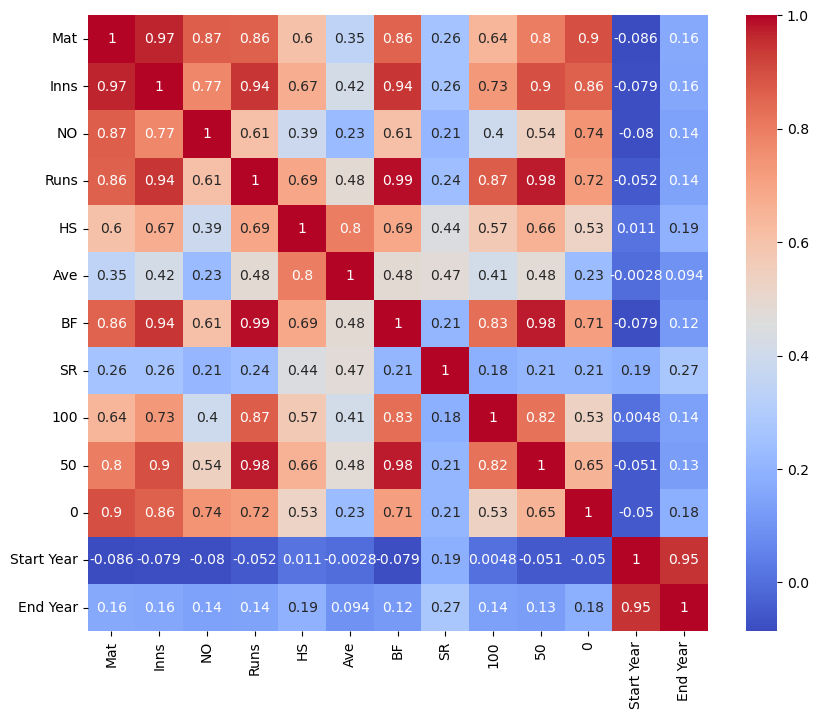

In [92]:
plt.figure(figsize = (10, 8))
sns.heatmap(batting.corr(), annot = True, cmap="coolwarm")
plt.savefig('Correlation')
plt.show()

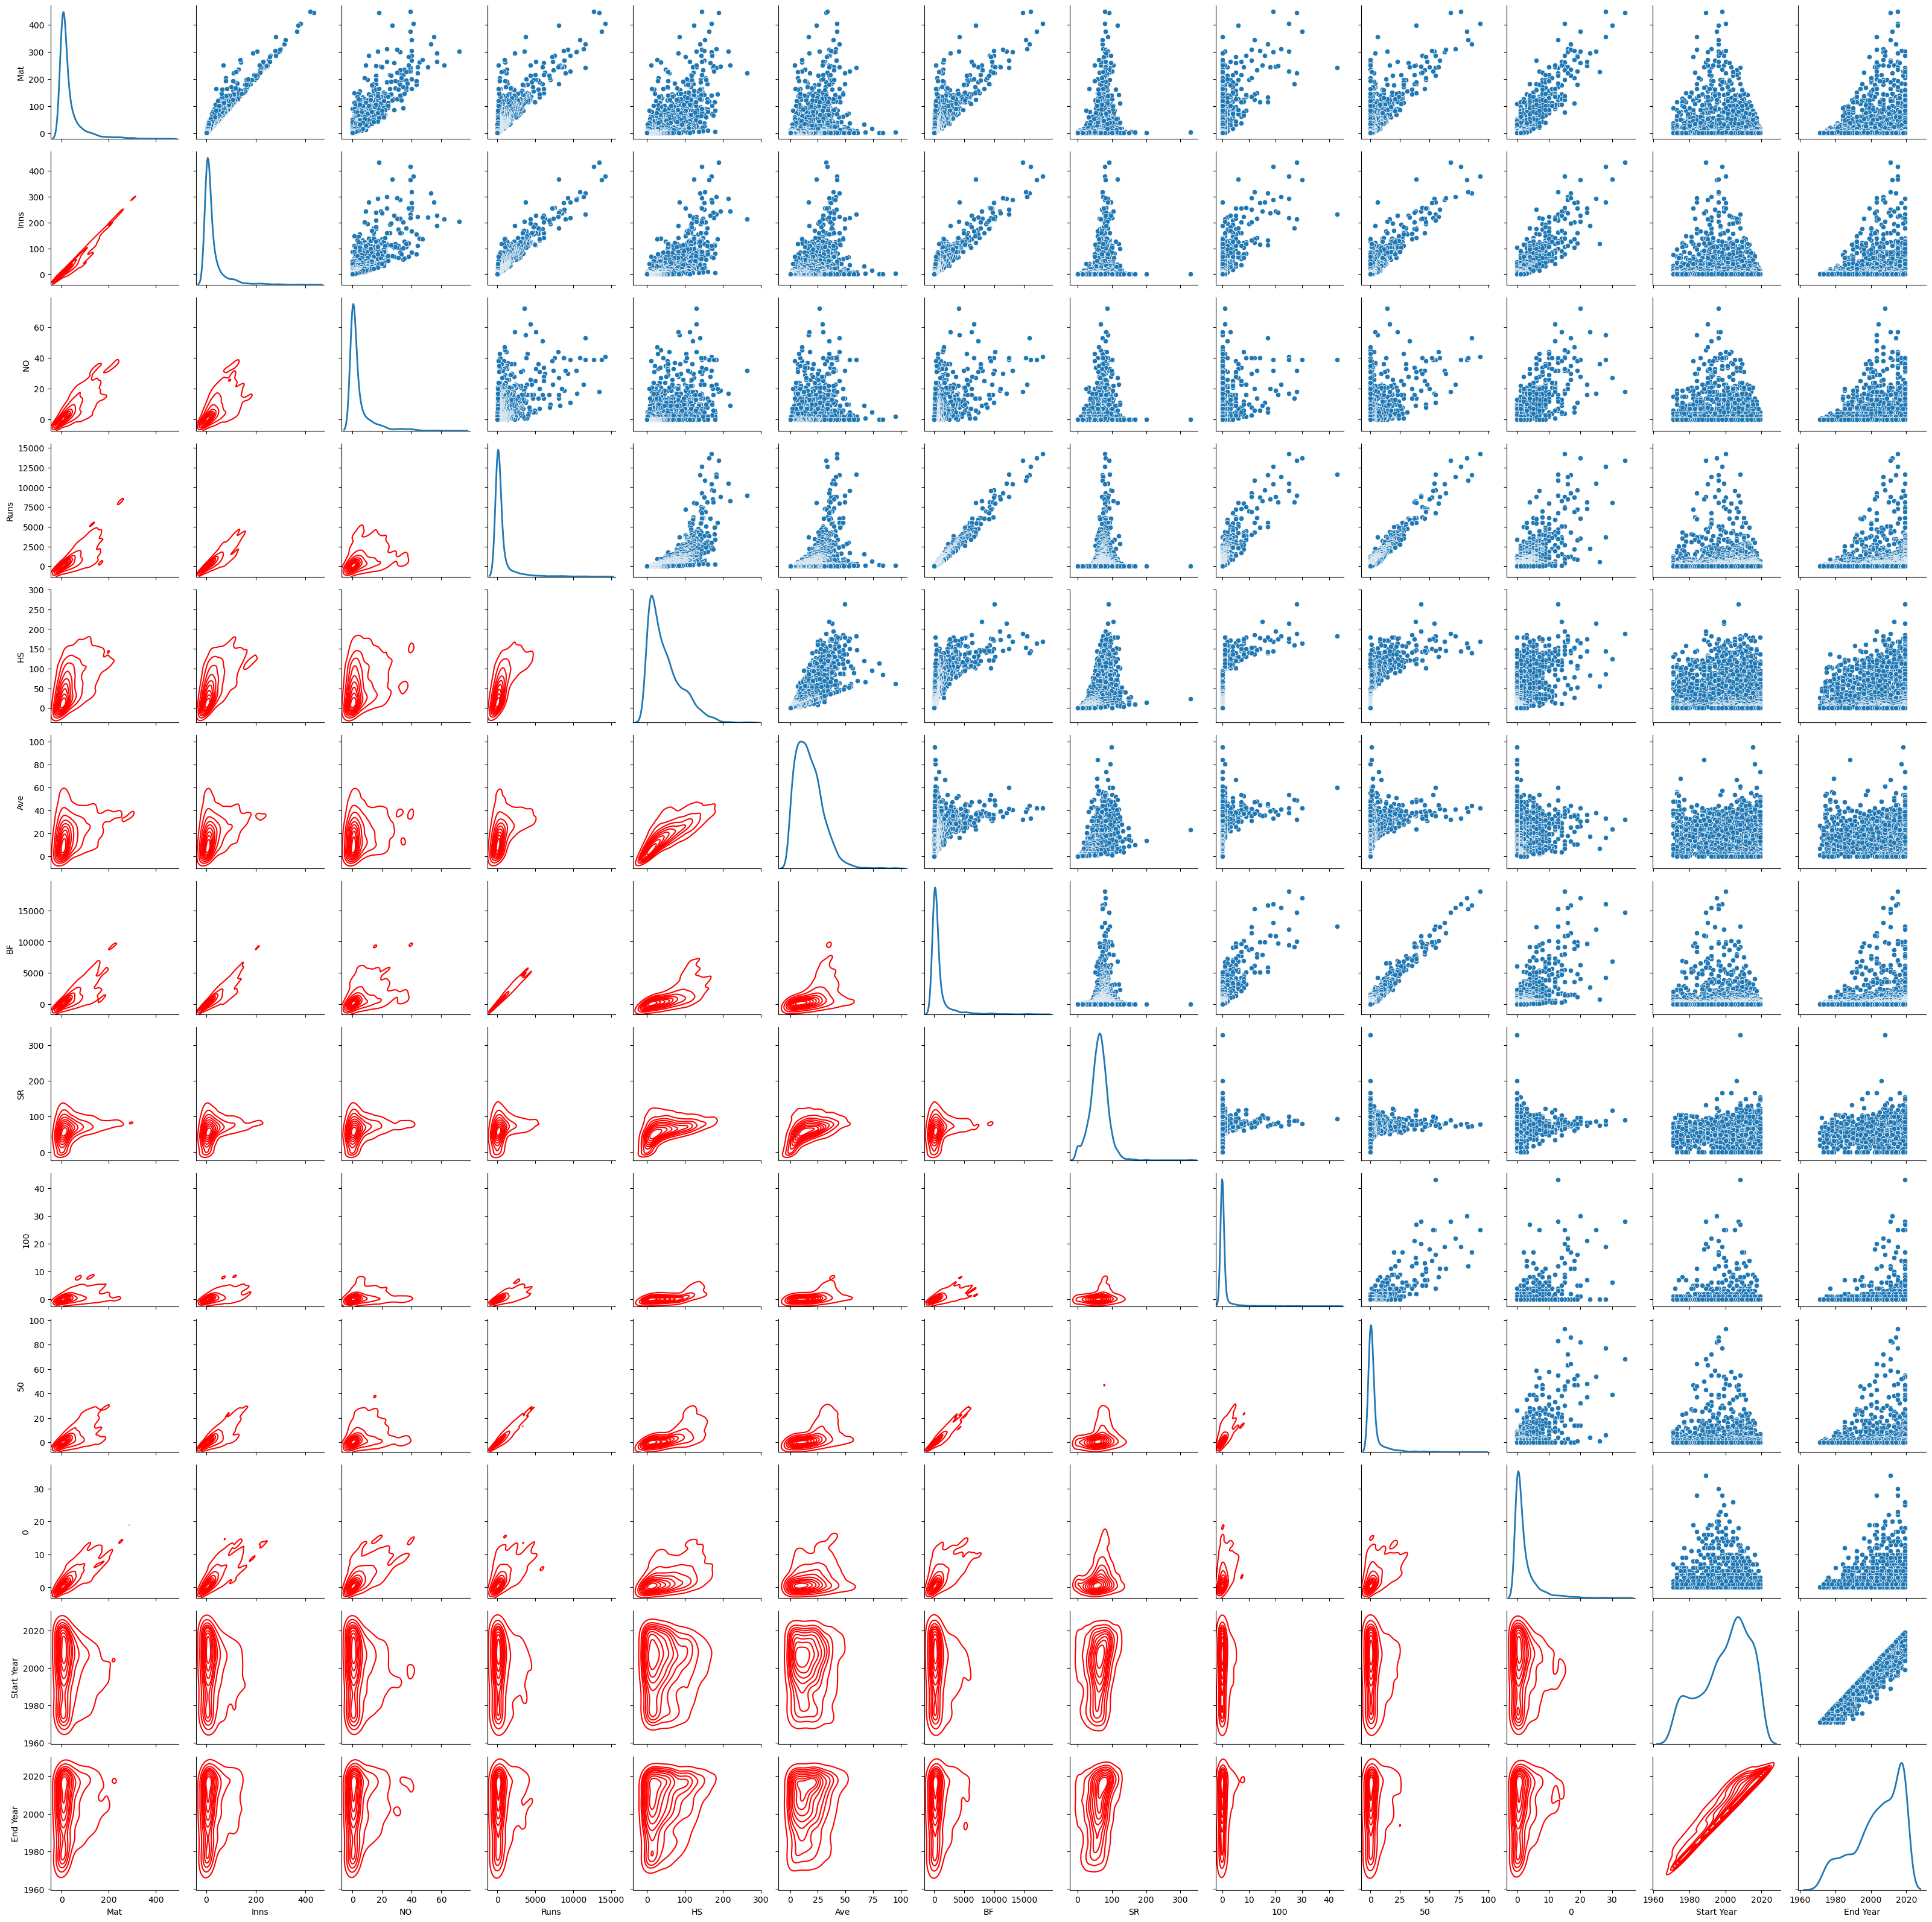

In [93]:
a = sns.PairGrid(batting, diag_sharey=False)
a.map_upper(sns.scatterplot)
a.map_lower(sns.kdeplot, colors="red")
a.map_diag(sns.kdeplot, lw=2)
plt.show()

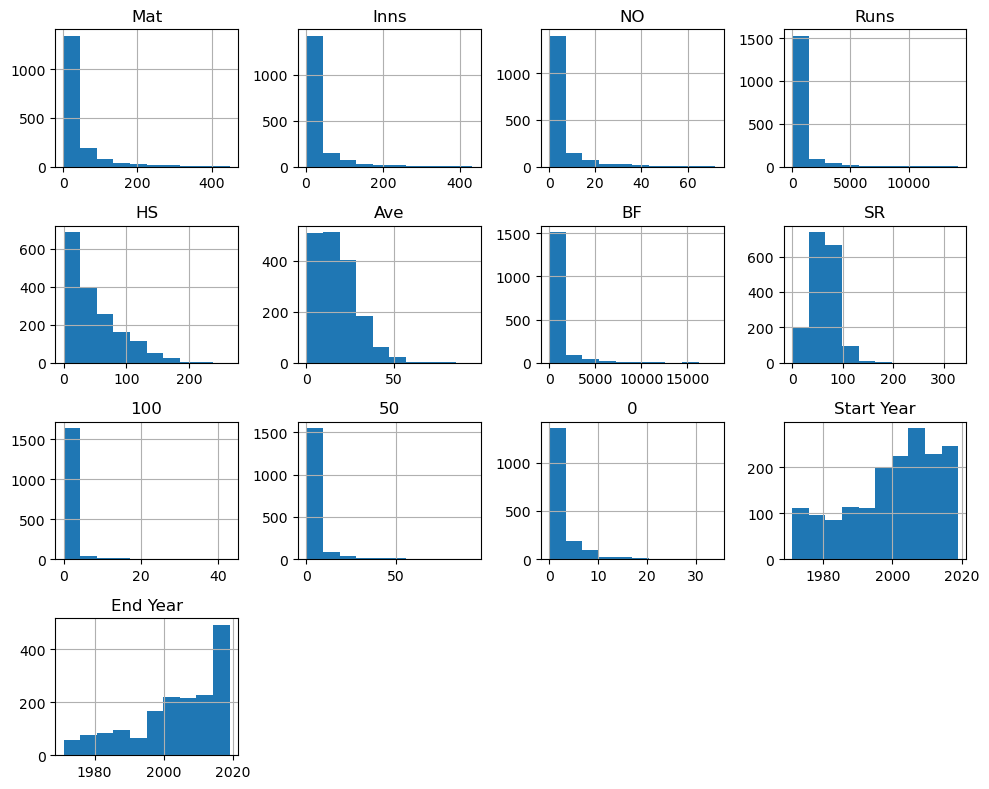

In [94]:
batting.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

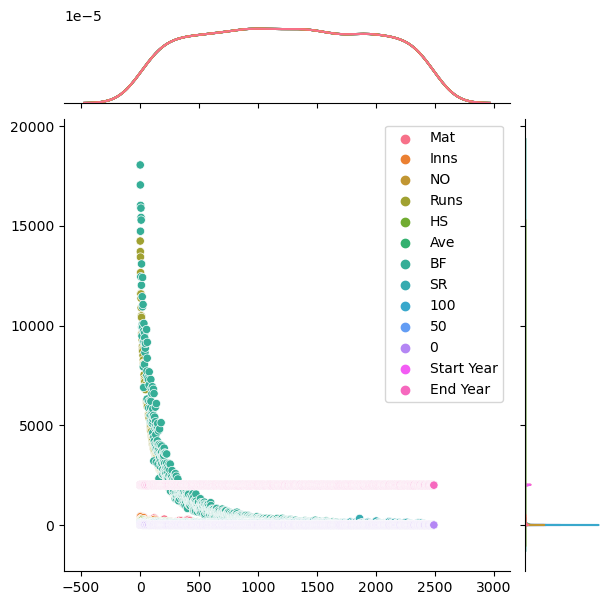

In [95]:
a = sns.JointGrid(data=batting, height=6)
a = a.plot(sns.scatterplot, sns.kdeplot)
plt.show()

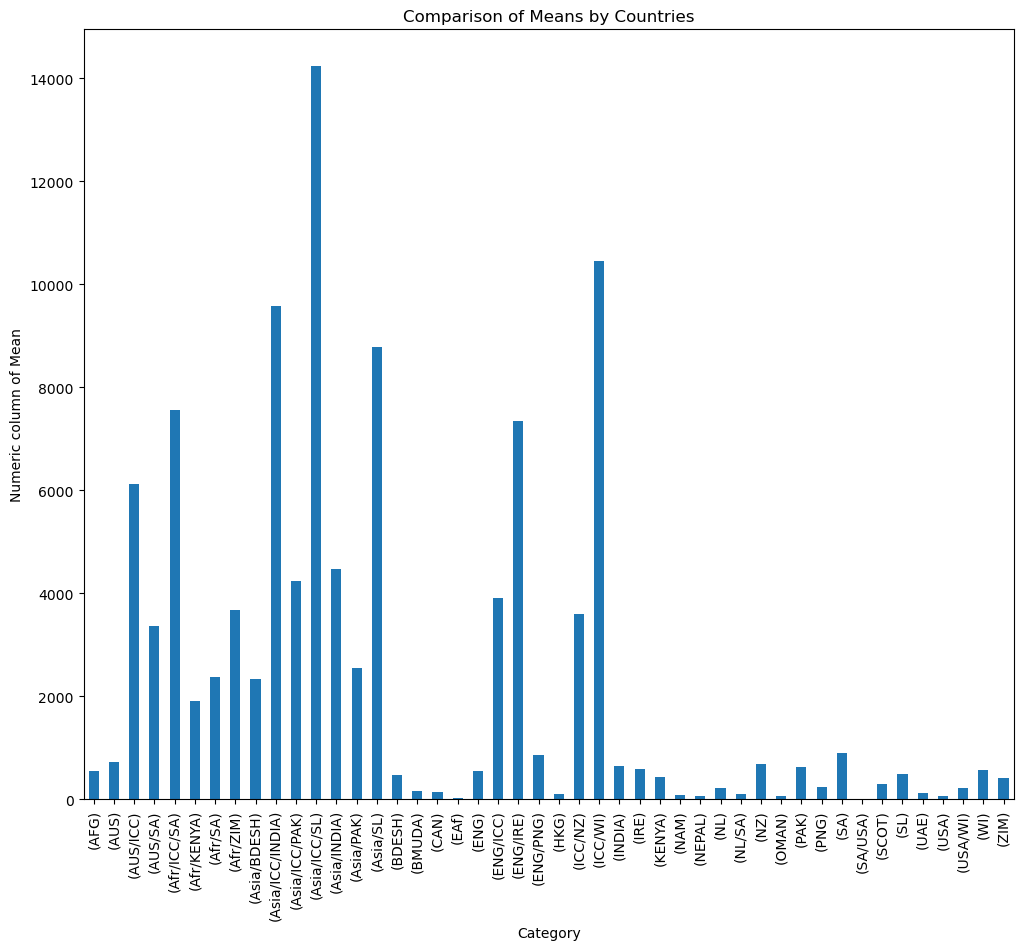

In [96]:
batting.groupby('Country')['Runs'].mean().plot(kind='bar', figsize=(12, 10))
plt.xlabel('Category')
plt.ylabel('Numeric column of Mean')
plt.title('Comparison of Means by Countries')
plt.show()

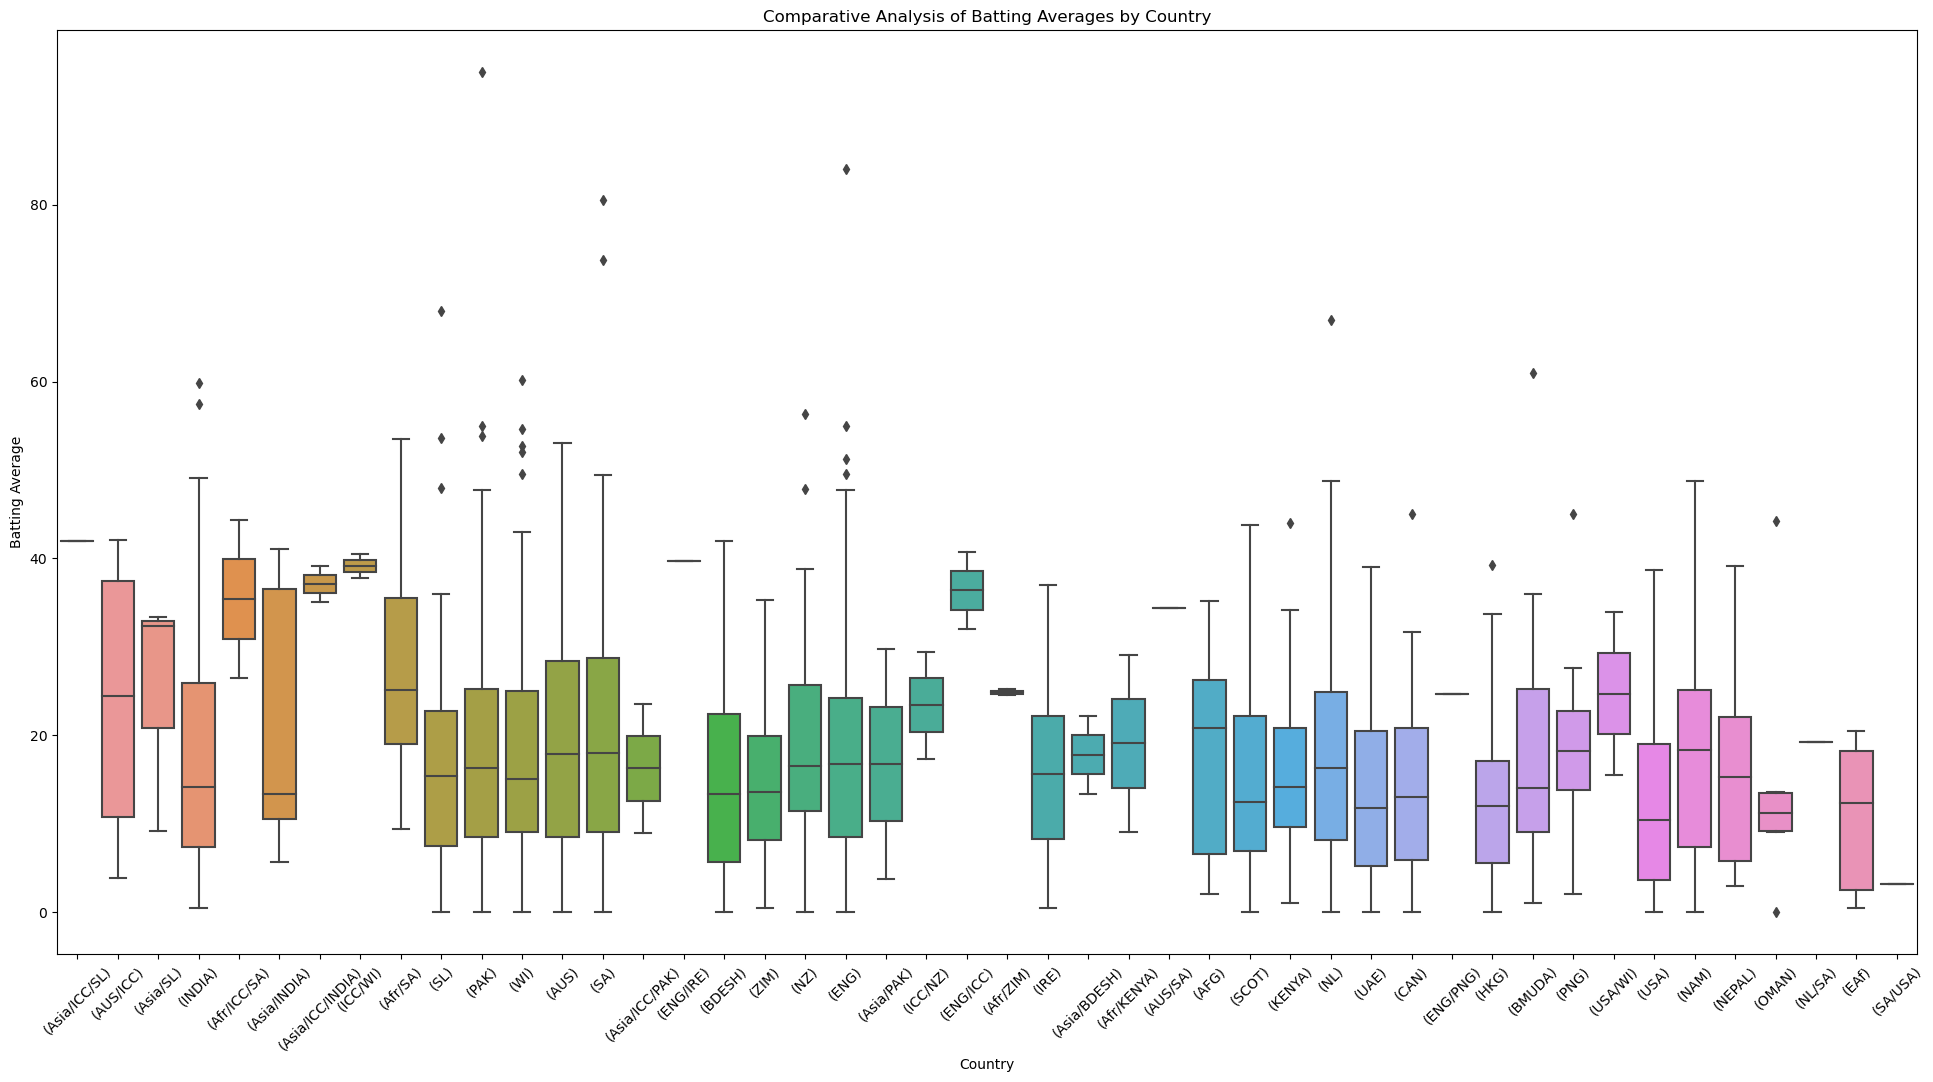

In [98]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=batting, x='Country', y='Ave')
plt.title('Comparative Analysis of Batting Averages by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

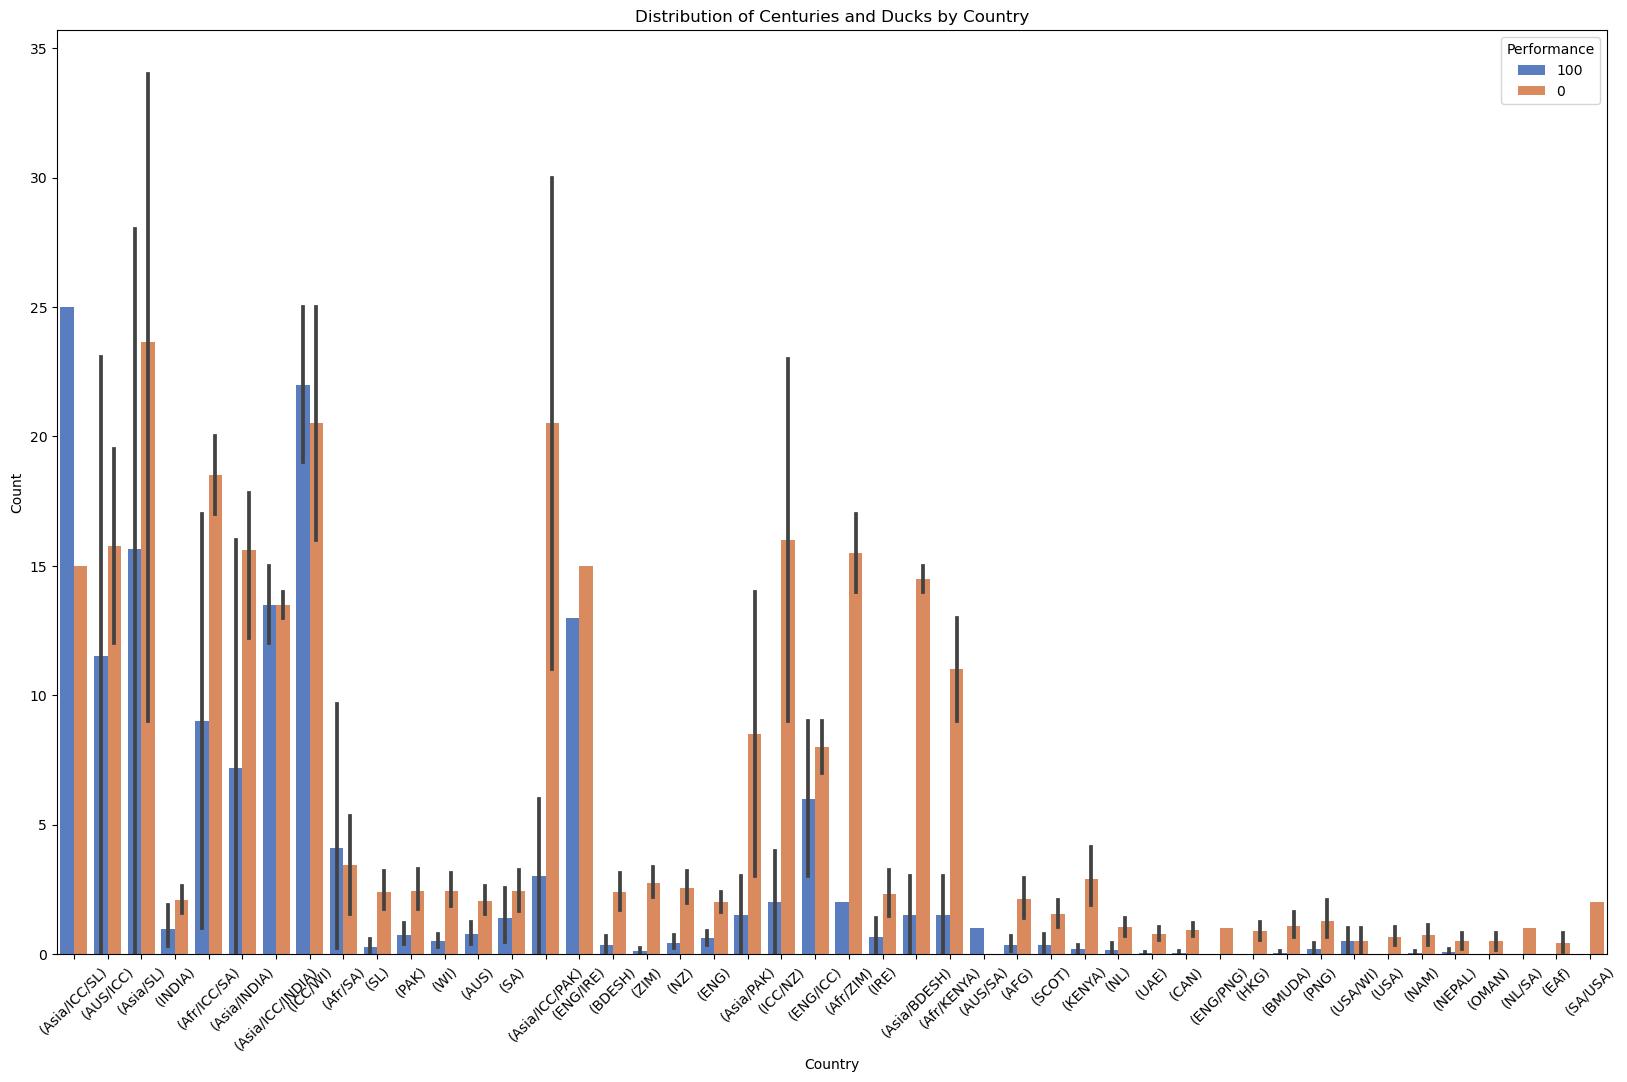

In [99]:
c_d = batting[['Country', '100', '0']].melt(id_vars='Country', var_name='Performance', value_name='Count')
plt.figure(figsize=(20, 12))
sns.barplot(data=c_d, x='Country', y='Count', hue='Performance', palette='muted')
plt.title('Distribution of Centuries and Ducks by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Performance')
plt.show()

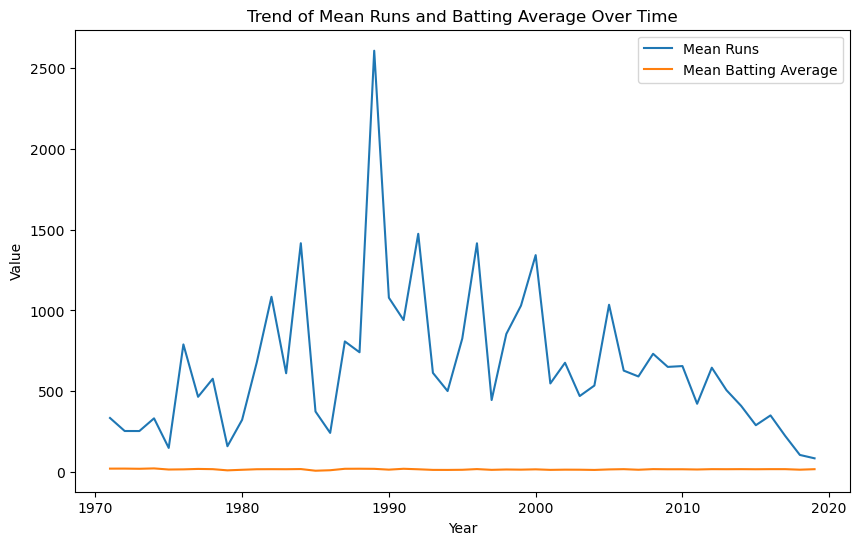

In [101]:
mean_runs = batting.groupby('Start Year')['Runs'].mean().reset_index()
mean_average = batting.groupby('Start Year')['Ave'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_runs, x='Start Year', y='Runs', label='Mean Runs')
sns.lineplot(data=mean_average, x='Start Year', y='Ave', label='Mean Batting Average')
plt.title('Trend of Mean Runs and Batting Average Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

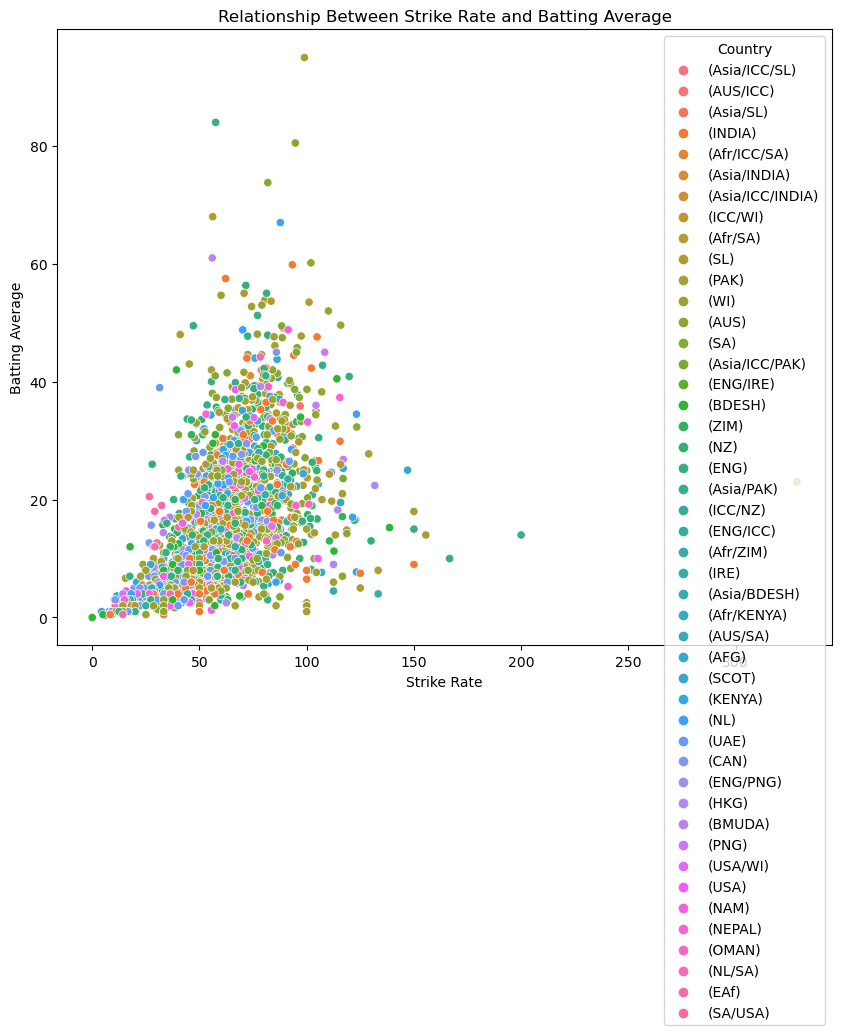

In [102]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=batting, x='SR', y='Ave', hue='Country')
plt.title('Relationship Between Strike Rate and Batting Average')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.legend(title='Country')
plt.show()

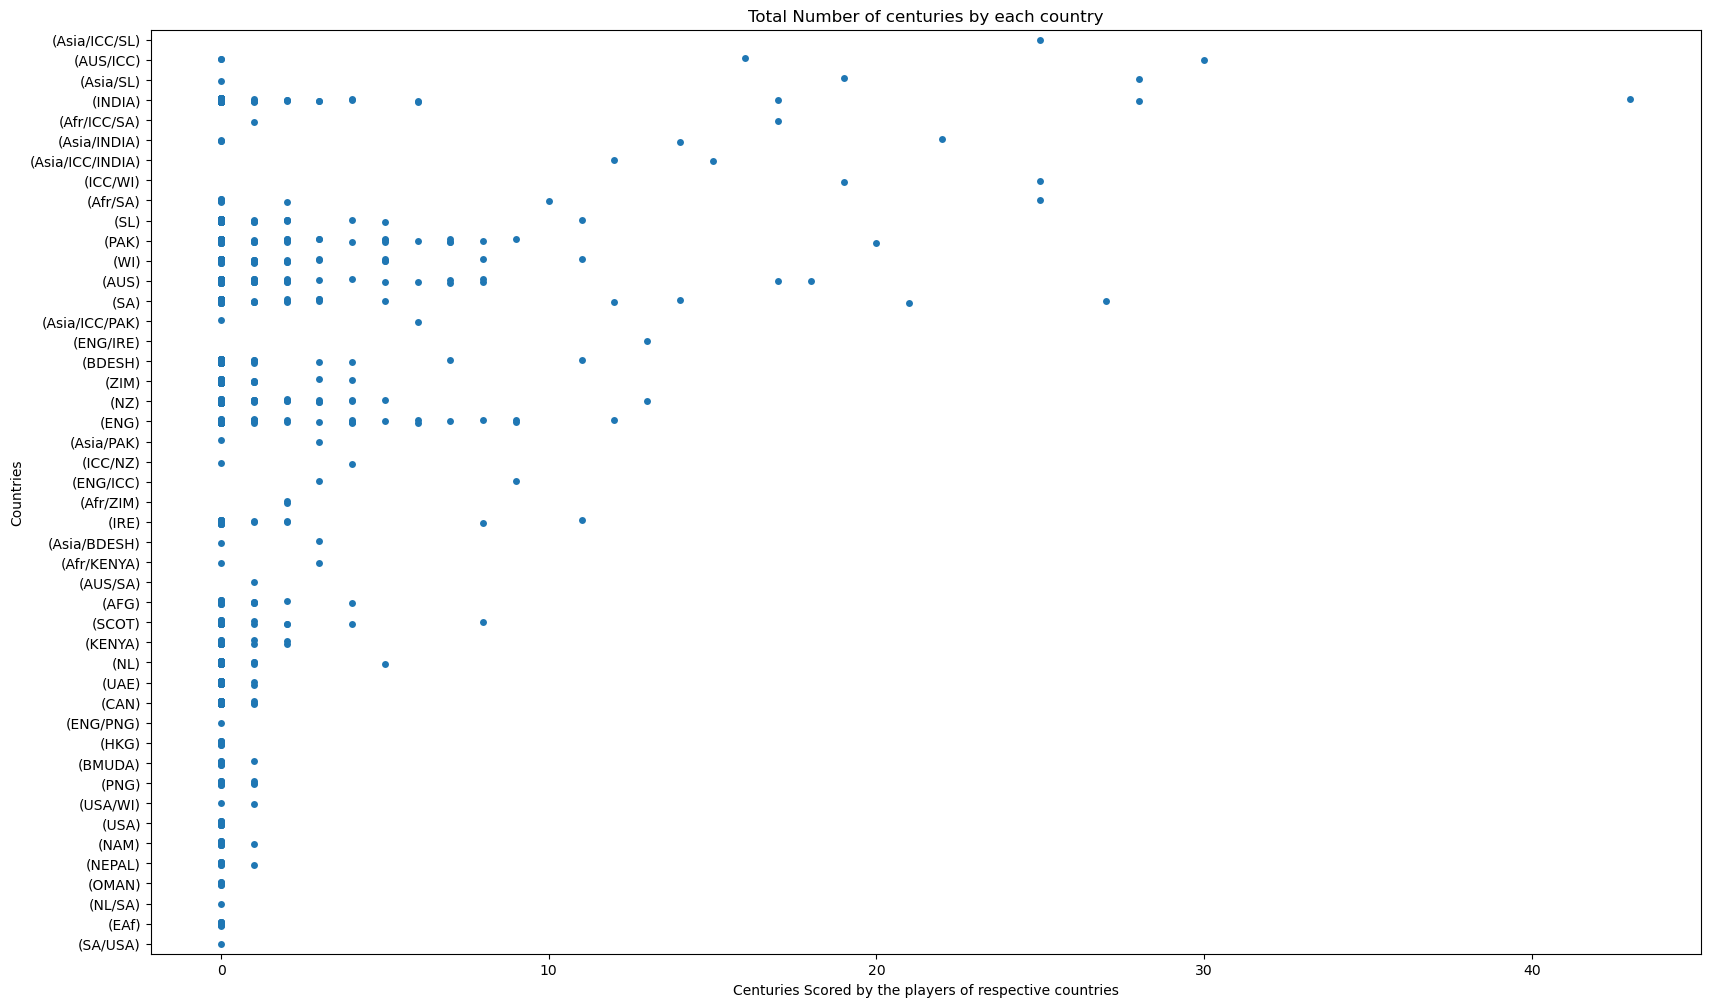

In [103]:
plt.figure(figsize=(20, 12))
sns.stripplot(y='Country', x='100', data=batting)
plt.xlabel('Centuries Scored by the players of respective countries')
plt.ylabel('Countries')
plt.title('Total Number of centuries by each country')
plt.show()

In [109]:
batting['Start Year'] = pd.to_datetime(batting['Start Year'], format='%Y')
batting['End Year'] = pd.to_datetime(batting['End Year'], format='%Y')
batting.set_index(['Start Year', 'End Year'], inplace=True)

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2813342307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Start Year'] = pd.to_datetime(batting['Start Year'], format='%Y')
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2813342307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['End Year'] = pd.to_datetime(batting['End Year'], format='%Y')


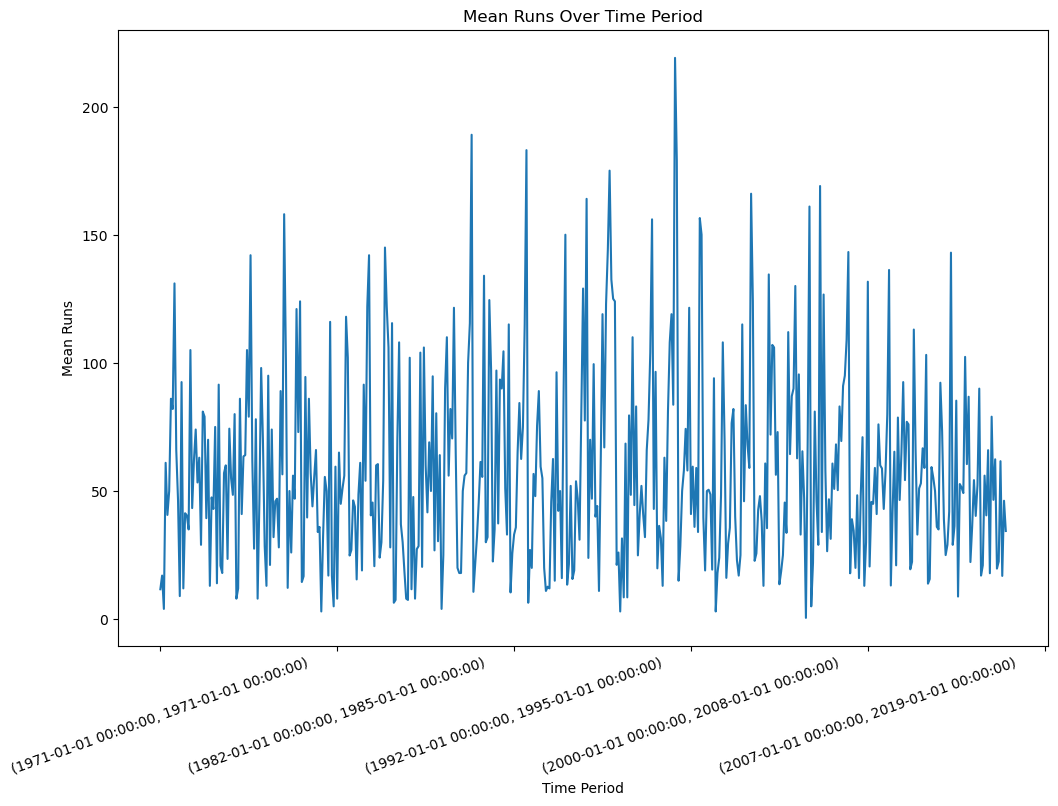

In [113]:
plt.figure(figsize=(20, 10))
runs = batting['HS'].groupby(level=[0, 1]).mean()
runs.plot(figsize=(12, 8), title='Mean Runs Over Time Period')
plt.xticks(rotation=20) 
plt.xlabel('Time Period')
plt.ylabel('Mean Runs')
plt.show()

In [114]:
x = range(len(runs))
y = runs.values

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)

Slope: 0.004766525900676225
Intercept: 57.29989931768411
R-squared: 0.0002950029785430947
P-value: 0.7076954349316622


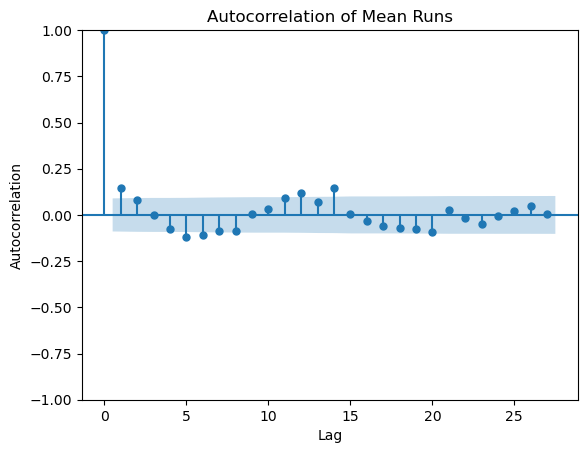

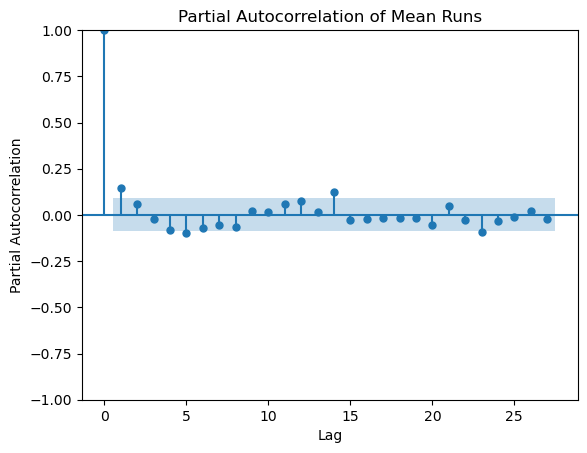

In [115]:
plot_acf(runs)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Mean Runs')
plt.show()

plot_pacf(runs)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation of Mean Runs')
plt.show()

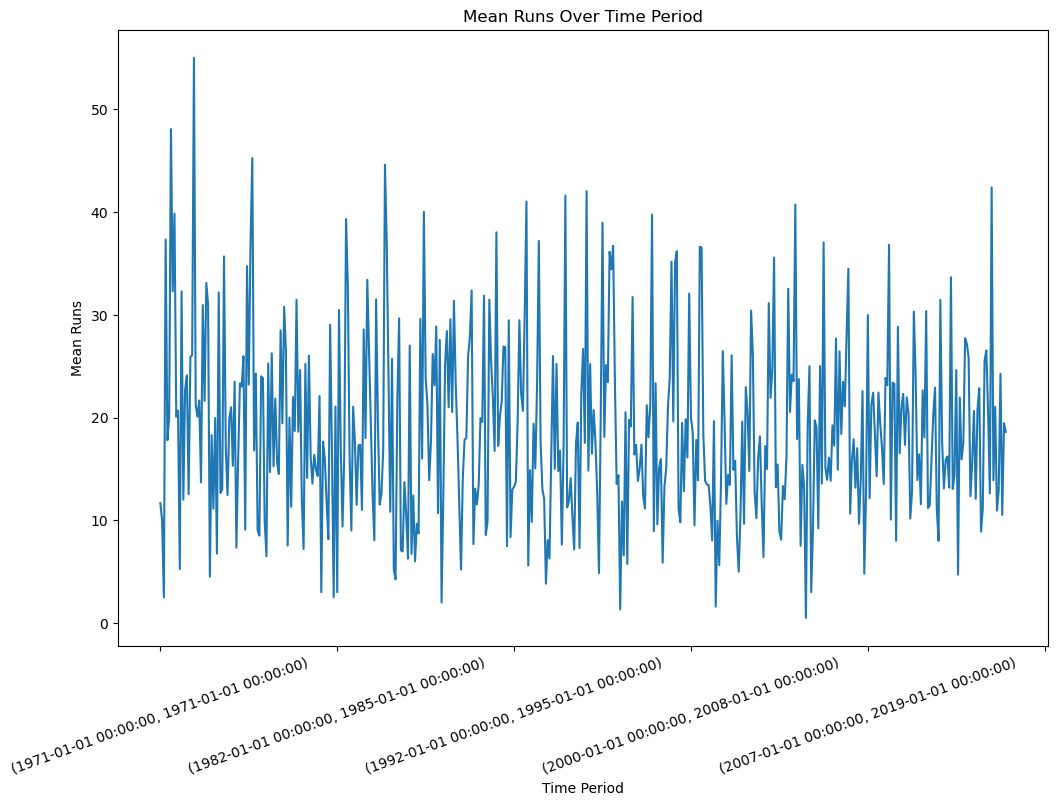

In [116]:
plt.figure(figsize=(20, 10))
amean = batting['Ave'].groupby(level=[0, 1]).mean()
amean.plot(figsize=(12, 8), title='Mean Runs Over Time Period')
plt.xticks(rotation=20) 
plt.xlabel('Time Period')
plt.ylabel('Mean Runs')
plt.show()

## Hypothesis: There is no significant difference between the mean strike rates of the countries 
As it can be seen that the P-value is low and a higher F-statistic indicates a larger difference, hence rejecting this hypothesis.

In [117]:
grouped = [batting[batting['Country'] == group]['SR'] for group in batting['Country'].unique()]
f_statistic, p_value = f_oneway(*grouped)
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 2.6123222155644483
P-value: 4.7397555314339173e-08


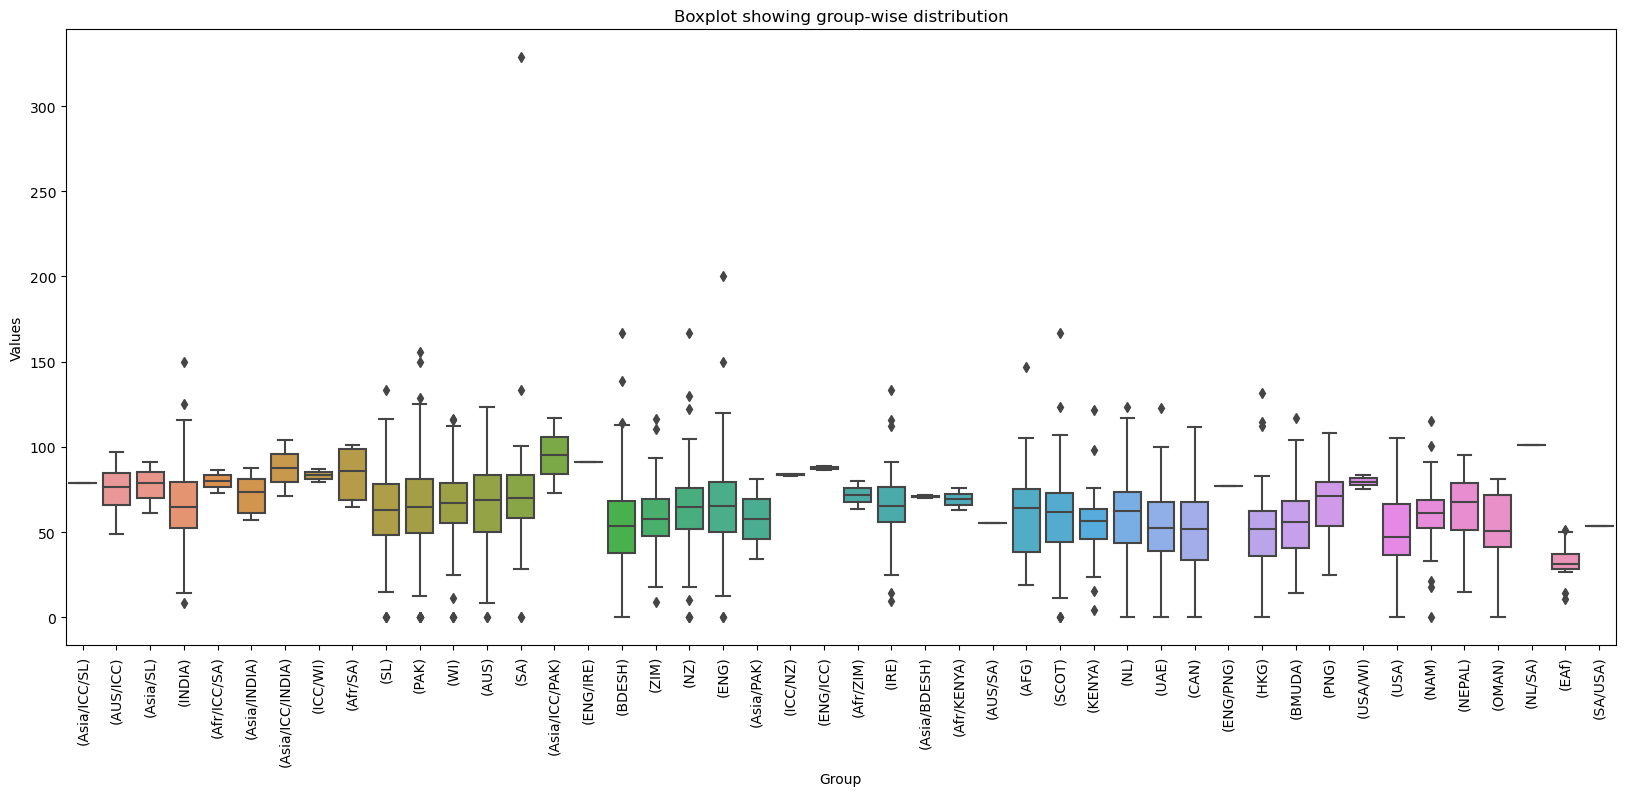

In [118]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Country', y='SR', data=batting)
plt.xticks(rotation=90) 
plt.title('Boxplot showing group-wise distribution')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()

## Hypothesis: There is a significant difference in the mean runs scored between players from India and Australia
It can be interpreted from the T-statistic and the P-value that there is a significant difference between both the teams which suggests strong evidence against the null hypothesis. 


In [119]:
 g1 = batting[batting['Country'] == '(INDIA)']['Runs']
 g2 = batting[batting['Country'] == '(AUS/ICC)']['Runs']
 groups = [group1, group2]
 t_stat, p_value = stats.ttest_ind(group1, group2)
 print(f"T-statistic: {t_stat}\nP-value: {p_value}")


T-statistic: -5.8876963037576955
P-value: 2.984816221086509e-08


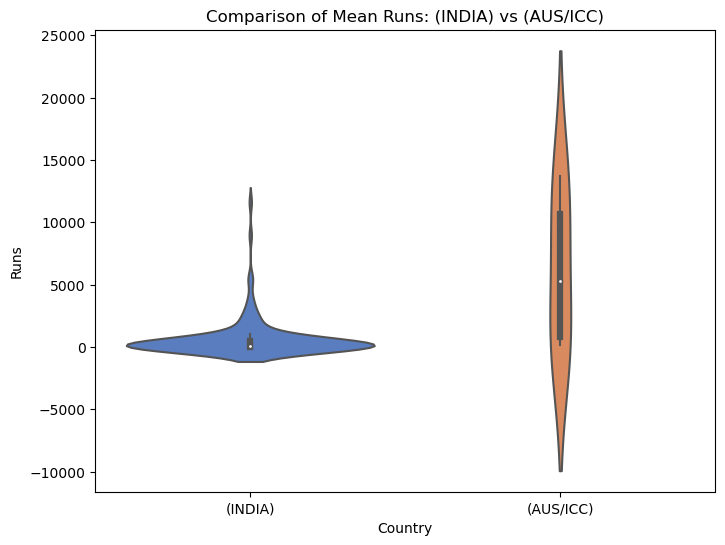

In [140]:
d = pd.DataFrame({'Country': ['(INDIA)'] * len(g1) + ['(AUS/ICC)'] * len(g2),
                     'Runs': np.concatenate([g1, g2])})
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country', y='Runs', data=d, palette='muted')
plt.title('Comparison of Mean Runs: (INDIA) vs (AUS/ICC)')
plt.xlabel('Country')
plt.ylabel('Runs')
plt.show()

## Hypothesis: There is a moderate linear relationship between player's batting average and both their strike rate and number of balls faced
We reject this hypothesis, as it can be seen by the visualizations and the resuklts of polynomial regression that the relationship between the batting average and both their strike rate and number of balls faced is non-linear, as batting average can be influenced by other factors as well.

In [120]:
correlation1 = batting['Ave'].corr(batting['SR'])
print(f"Correlation between Batting Average and Strike Rate: {correlation1}")

Correlation between Batting Average and Strike Rate: 0.4738568874296216


In [121]:
correlation2 = batting['Ave'].corr(batting['BF'])
print(f"Correlation between Batting Average and Balls Faced: {correlation2}")

Correlation between Batting Average and Balls Faced: 0.48407155789856293


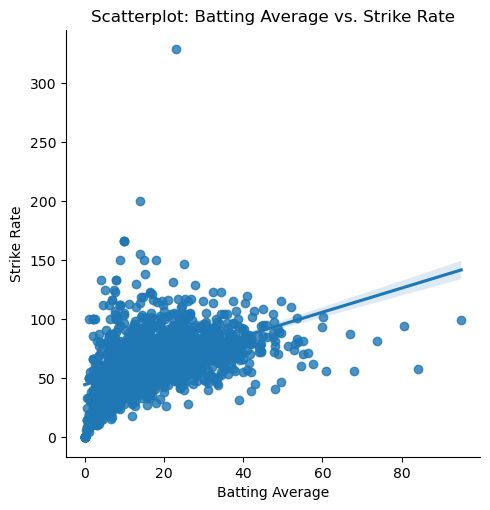

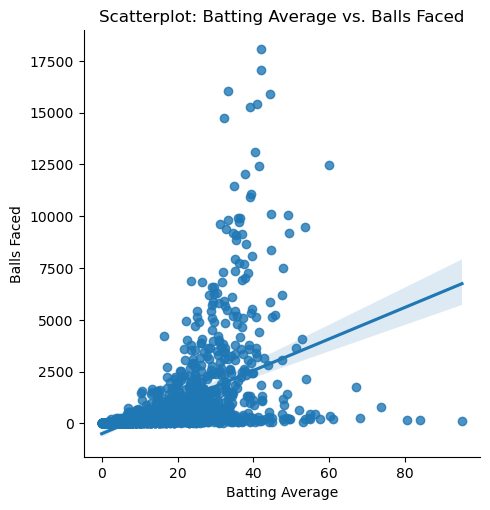

In [137]:
sns.lmplot(x='Ave', y='SR', data=batting)
plt.title('Scatterplot: Batting Average vs. Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.show()

# Scatterplot and regression line for Batting Average vs. Balls Faced
sns.lmplot(x='Ave', y='BF', data=batting)
plt.title('Scatterplot: Batting Average vs. Balls Faced')
plt.xlabel('Batting Average')
plt.ylabel('Balls Faced')
plt.show()


In [138]:
X = np.column_stack((batting['SR'], batting['SR'] ** 2))
X = sm.add_constant(X)
model_poly_SR = sm.OLS(batting['Ave'], X).fit()
print(model_poly_SR.summary())

# Polynomial regression (second degree) for Batting Average vs. Balls Faced
X = np.column_stack((batting['BF'], batting['BF'] ** 2))
X = sm.add_constant(X)
model_poly_BF = sm.OLS(batting['Ave'], X).fit()
print(model_poly_BF.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ave   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     326.4
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.06e-120
Time:                        14:21:20   Log-Likelihood:                -6386.5
No. Observations:                1704   AIC:                         1.278e+04
Df Residuals:                    1701   BIC:                         1.280e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4225      0.843     -2.874      0.0

## Hypothesis: There is a significant difference between the batting average of different players/countries
the low P-value and the F-statistic being greater than 1 suggests that there are very few variations in the mean averages among the countries hence rejecting this hypothesis and indicating that the batting averages are not much different for different players and countries. Since it can be proved by conducting the Tuckey's test and getting the output as False in the reject column showing not much difference in the batting averages.

In [122]:
f_statistic, p_value = f_oneway(*[batting[batting['Country'] == country]['Ave'] for country in batting['Country'].unique()])
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 2.18490831019087
P-value: 1.1958839242468402e-05


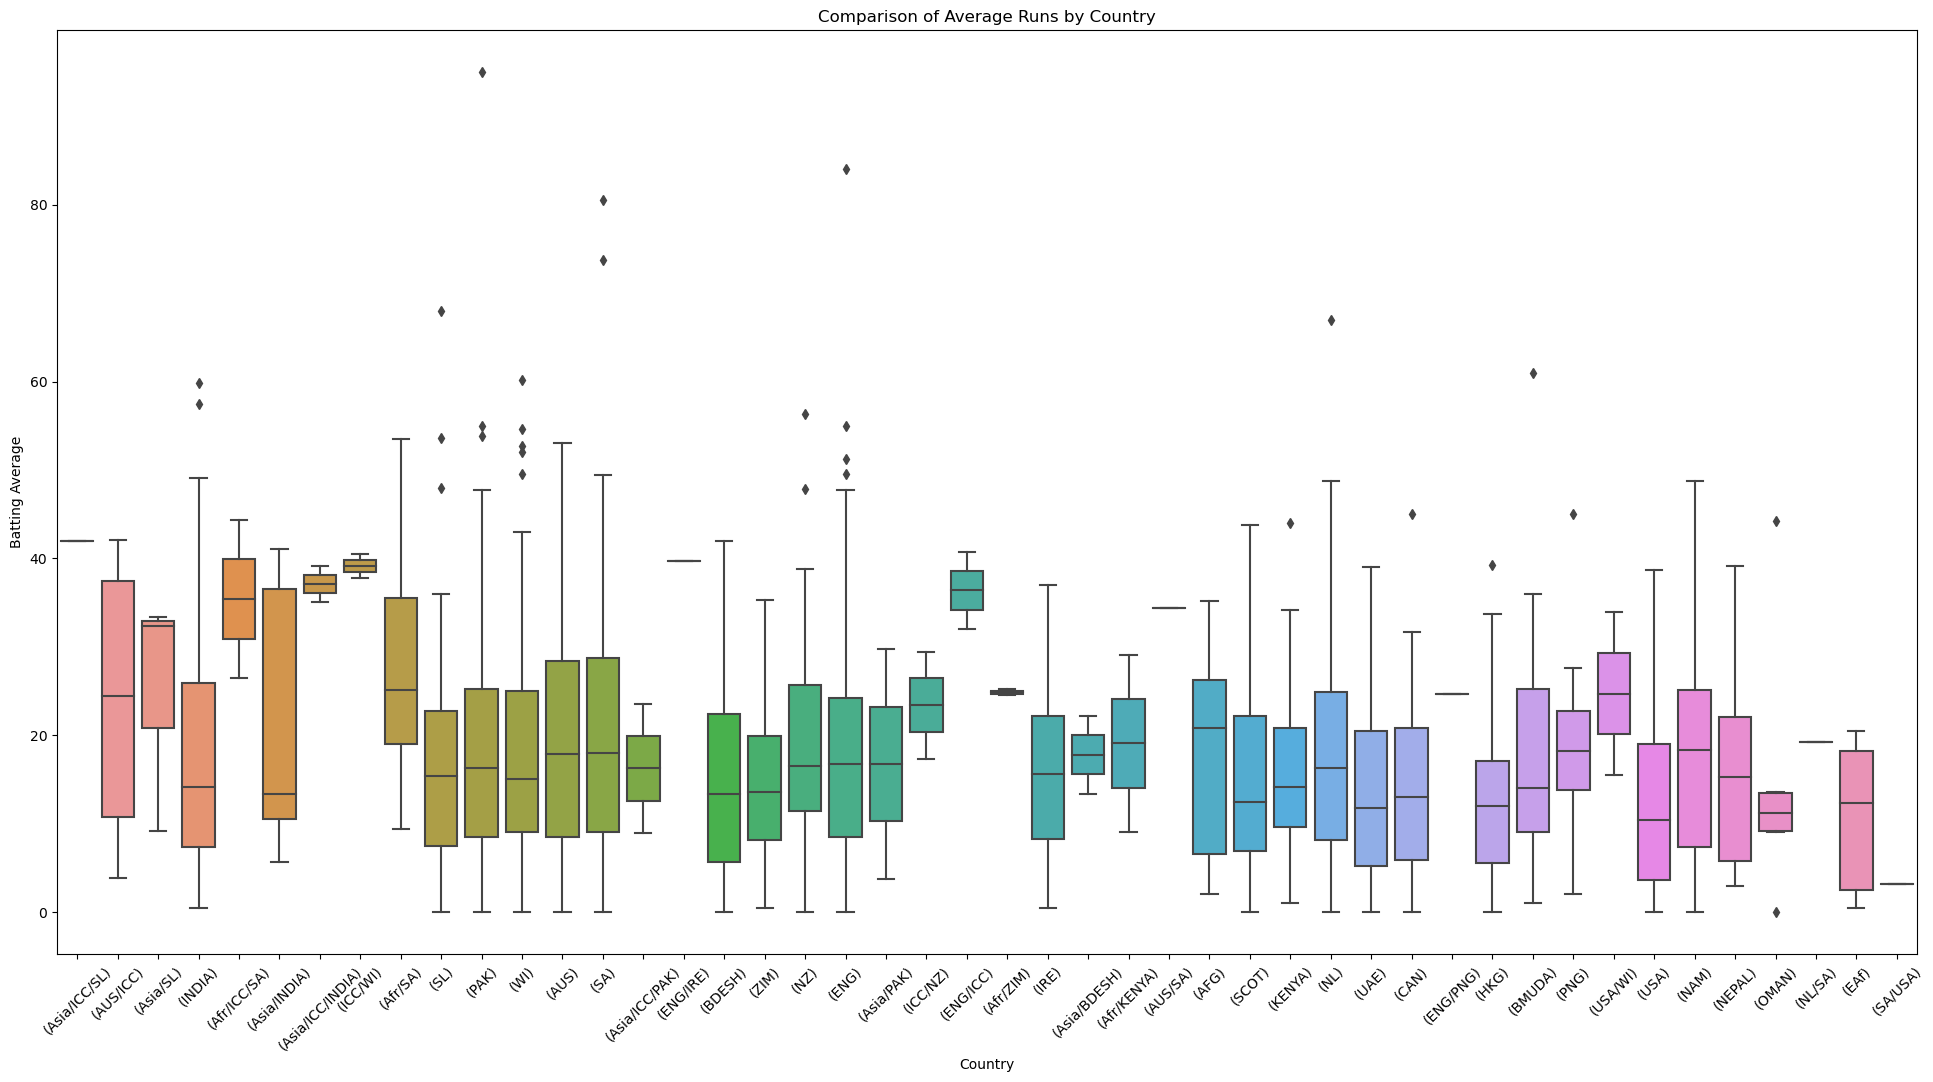

In [125]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=batting, x='Country', y='Ave')
plt.title('Comparison of Average Runs by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

In [136]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(batting['Ave'], batting['Country'])

# Print the summary of the test
print(tukey.summary())


           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2      meandiff p-adj    lower    upper  reject
--------------------------------------------------------------------------
           (AFG)            (AUS)    2.193    1.0   -7.5999 11.9859  False
           (AFG)        (AUS/ICC)   6.4911    1.0  -18.7003 31.6825  False
           (AFG)         (AUS/SA)  17.1411    1.0  -30.8219 65.1041  False
           (AFG)     (Afr/ICC/SA)  18.1961 0.9958  -16.2987 52.6908  False
           (AFG)      (Afr/KENYA)   1.8611    1.0  -32.6337 36.3558  False
           (AFG)         (Afr/SA)   9.9033 0.9914   -8.1554  27.962  False
           (AFG)        (Afr/ZIM)   7.6761    1.0  -26.8187 42.1708  False
           (AFG)     (Asia/BDESH)   0.5961    1.0  -33.8987 35.0908  False
           (AFG) (Asia/ICC/INDIA)  19.8961 0.9797  -14.5987 54.3908  False
           (AFG)   (Asia/ICC/PAK)  -0.9489    1.0  -35.4437 33.5458  False
           (AFG)    (Asia

## Hypothesis: A player's batting average and strike rate are relative, as if the average is higher than the strike rate is higher too
The positive correlation coefficient and a low P-value suggests that there is positive linear relationship between the batting average and strike rate as it can be seen that if one of it increases, than the other increases too following the trend.

In [127]:
correlation, p_value = pearsonr(batting['Ave'], batting['SR'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.47385688742962173
P-value: 4.214605328785315e-96


<Figure size 1000x800 with 0 Axes>

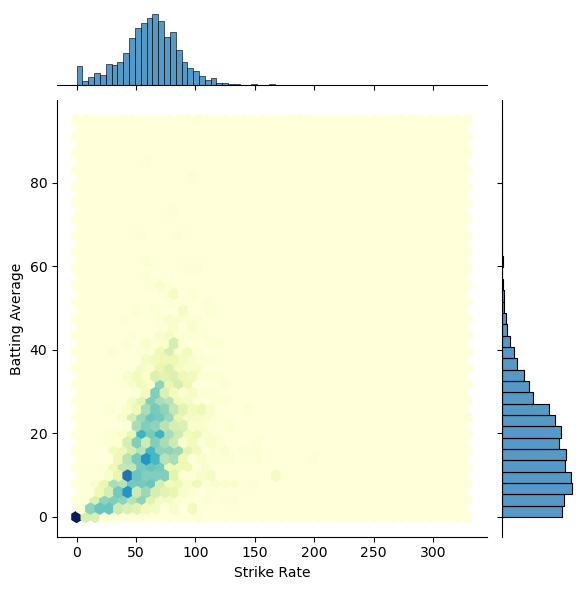

In [128]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=batting, x='SR', y='Ave', kind='hex', cmap='YlGnBu')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.show()

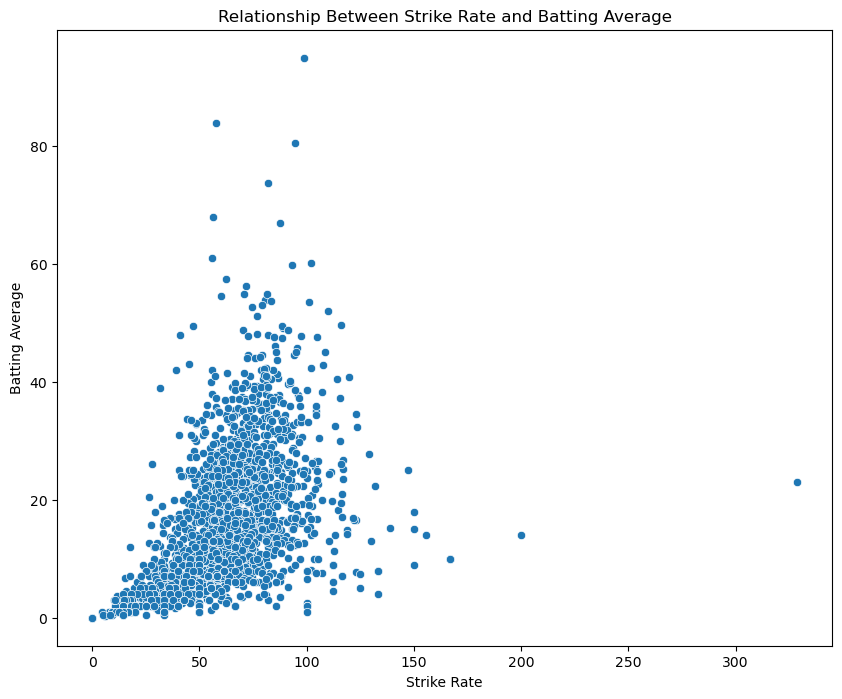

In [129]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=batting, x='SR', y='Ave')
plt.title('Relationship Between Strike Rate and Batting Average')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.show()

## Hypothesis: the frequency of centuries and ducks scored by players might not be independent of the country they belong to.
The higher CHi-square test value and 0.0 P-value suggests a strong association between the ducks and centuries scored with the countries. Showing that it doesnt matter if a team is performing good or bad the occurance of a century or duck can be seen with any team/country

In [130]:
contingency = pd.crosstab(batting['Country'], [batting['100'], batting['0']])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 20607.484486180234
P-value: 0.0
Degrees of freedom: 5895
Expected frequencies:
[[1.05328638e+01 6.04694836e+00 2.54694836e+00 ... 1.64319249e-02
  1.64319249e-02 1.64319249e-02]
 [5.04072770e+01 2.89389671e+01 1.21889671e+01 ... 7.86384977e-02
  7.86384977e-02 7.86384977e-02]
 [1.50469484e+00 8.63849765e-01 3.63849765e-01 ... 2.34741784e-03
  2.34741784e-03 2.34741784e-03]
 ...
 [7.52347418e-01 4.31924883e-01 1.81924883e-01 ... 1.17370892e-03
  1.17370892e-03 1.17370892e-03]
 [4.58931925e+01 2.63474178e+01 1.10974178e+01 ... 7.15962441e-02
  7.15962441e-02 7.15962441e-02]
 [3.42318075e+01 1.96525822e+01 8.27758216e+00 ... 5.34037559e-02
  5.34037559e-02 5.34037559e-02]]


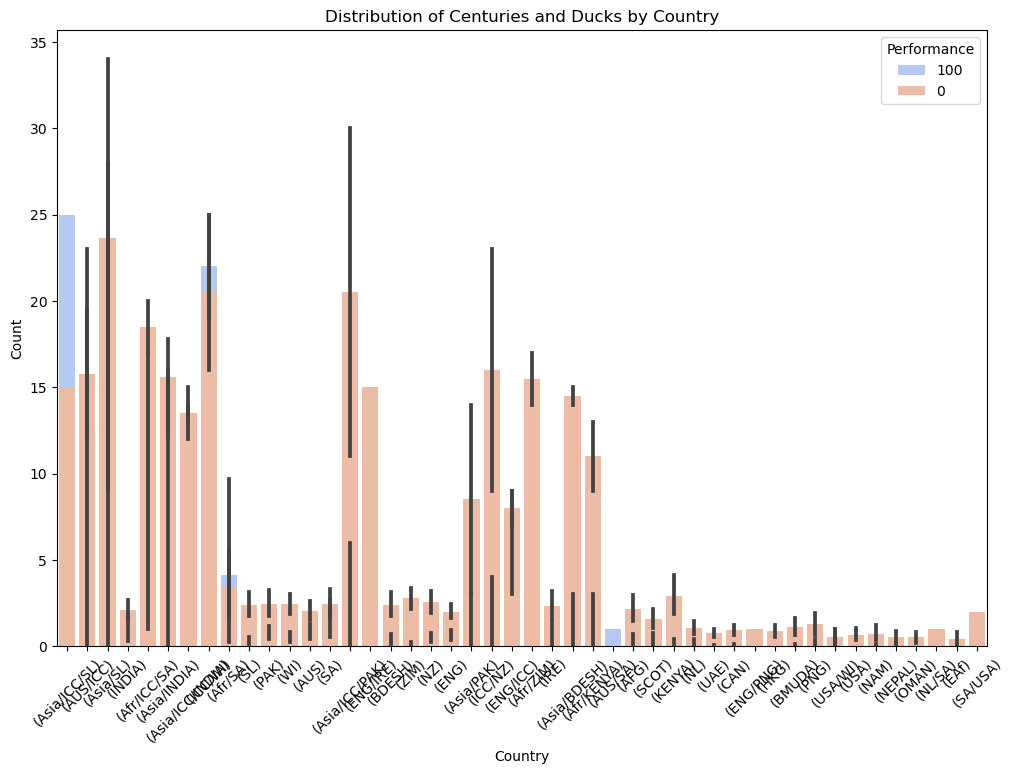

In [131]:
c_d = batting[['Country', '100', '0']]
c_d = c_d.melt(id_vars='Country', var_name='Performance', value_name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=c_d, x='Country', y='Count', hue='Performance', palette='coolwarm', dodge=False)
plt.title('Distribution of Centuries and Ducks by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Performance')
plt.xticks(rotation=45)
plt.show()

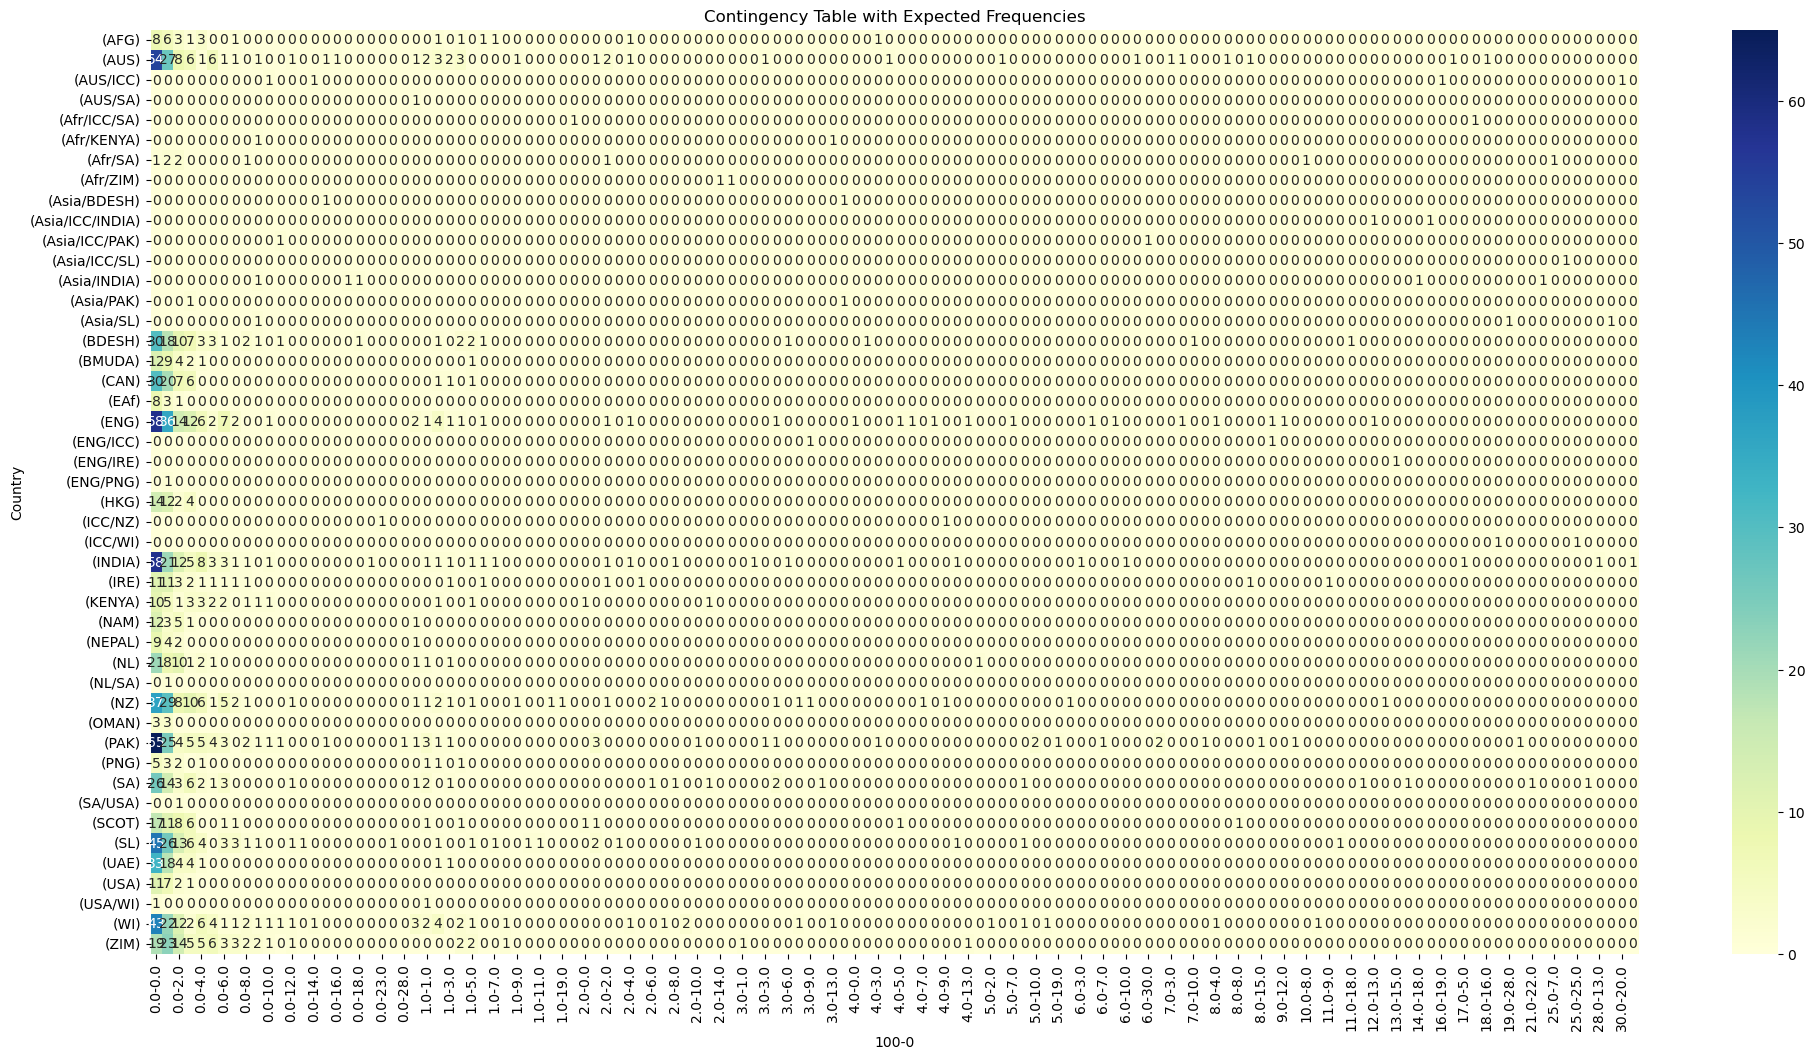

In [134]:
plt.figure(figsize=(24, 12))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")
plt.title('Contingency Table with Expected Frequencies')
plt.show()

# Bowling Dataset

In [142]:
bowling = pd.read_csv('Bowling_ODI.csv')

In [143]:
bowling.head()

Unnamed: 0                        Player       Span  Mat Inns  Balls  \
0           0  M Muralitharan (Asia/ICC/SL)  1993-2011  350  341  18811   
1           1             Wasim Akram (PAK)  1984-2003  356  351  18186   
2           2            Waqar Younis (PAK)  1989-2003  262  258  12698   
3           3          WPUJC Vaas (Asia/SL)  1994-2008  322  320  15775   
4           4  Shahid Afridi (Asia/ICC/PAK)  1996-2015  398  372  17670   

    Runs Wkts   BBI    Ave  Econ    SR   4   5  Unnamed: 13  
0  12326  534  7/30  23.08  3.93  35.2  15  10          NaN  
1  11812  502  5/15  23.52  3.89  36.2  17   6          NaN  
2   9919  416  7/36  23.84  4.68  30.5  14  13          NaN  
3  11014  400  8/19  27.53  4.18  39.4   9   4          NaN  
4  13632  395  7/12  34.51  4.62  44.7   4   9          NaN

In [144]:
bowling.dtypes

Unnamed: 0       int64
Player          object
Span            object
Mat              int64
Inns            object
Balls           object
Runs            object
Wkts            object
BBI             object
Ave             object
Econ            object
SR              object
4               object
5               object
Unnamed: 13    float64
dtype: object

In [145]:
bowling[['Start Year','End Year']] = bowling.Span.str.split("-",expand=True) 

In [146]:
bowling = bowling.replace('-', 0)
bowling = bowling.replace('- ', 0)
bowling = bowling.replace(' -', 0)
bowling = bowling.replace(' - ', 0)

In [147]:
bowling.drop(columns=['Unnamed: 0'], inplace=True)
bowling.drop(columns=['Span'], inplace=True)
bowling.drop(columns=['Unnamed: 13'], inplace=True)

In [148]:
bowling.Player

0       M Muralitharan (Asia/ICC/SL)
1                  Wasim Akram (PAK)
2                 Waqar Younis (PAK)
3               WPUJC Vaas (Asia/SL)
4       Shahid Afridi (Asia/ICC/PAK)
                    ...             
2577                TJ Zoehrer (AUS)
2578                    K Zondo (SA)
2579                B Zuiderent (NL)
2580                Zulqarnain (PAK)
2581         Zulqarnain Haider (PAK)
Name: Player, Length: 2582, dtype: object

In [149]:
bowling.Player.str.split(" ")
bowling['Country'] = bowling.Player.str.split(" ").str.get(-1)
bowling['Player Name'] = bowling.Player.str.split(" ").str.get(1)

In [150]:
bowling['Player'] = bowling['Player Name']
bowling.drop(columns=['Player Name'], inplace=True)

In [151]:
bowling['Inns'] = pd.to_numeric(bowling['Inns'], errors='coerce')
bowling['Mat'] = pd.to_numeric(bowling['Mat'], errors='coerce')
bowling['Balls'] = pd.to_numeric(bowling['Balls'], errors='coerce')
bowling['Runs'] = pd.to_numeric(bowling['Runs'], errors='coerce')
bowling['Wkts'] = pd.to_numeric(bowling['Wkts'], errors='coerce')
bowling['Ave'] = pd.to_numeric(bowling['Ave'], errors='coerce')
bowling['SR'] = pd.to_numeric(bowling['SR'], errors='coerce')
bowling['5'] = pd.to_numeric(bowling['5'], errors='coerce')
bowling['4'] = pd.to_numeric(bowling['4'], errors='coerce')
bowling['Econ'] = pd.to_numeric(bowling['Econ'], errors='coerce')
bowling['Start Year'] = pd.to_numeric(bowling['Start Year'], errors='coerce')
bowling['End Year'] = pd.to_numeric(bowling['End Year'], errors='coerce')

In [152]:
bowling.isnull().sum()

Player        0
Mat           0
Inns          0
Balls         0
Runs          0
Wkts          0
BBI           0
Ave           0
Econ          0
SR            0
4             0
5             0
Start Year    0
End Year      0
Country       0
dtype: int64

In [153]:
bowling.head()

Player  Mat  Inns  Balls   Runs  Wkts   BBI    Ave  Econ    SR   4  \
0  Muralitharan  350   341  18811  12326   534  7/30  23.08  3.93  35.2  15   
1         Akram  356   351  18186  11812   502  5/15  23.52  3.89  36.2  17   
2        Younis  262   258  12698   9919   416  7/36  23.84  4.68  30.5  14   
3          Vaas  322   320  15775  11014   400  8/19  27.53  4.18  39.4   9   
4        Afridi  398   372  17670  13632   395  7/12  34.51  4.62  44.7   4   

    5  Start Year  End Year         Country  
0  10        1993      2011   (Asia/ICC/SL)  
1   6        1984      2003           (PAK)  
2  13        1989      2003           (PAK)  
3   4        1994      2008       (Asia/SL)  
4   9        1996      2015  (Asia/ICC/PAK)

In [154]:
bowling.describe()

Mat         Inns         Balls          Runs         Wkts  \
count  2582.00000  2582.000000   2582.000000   2582.000000  2582.000000   
mean     36.03718    19.431448    865.308675    678.481022    20.933772   
std      58.27430    39.640810   1866.739974   1407.744194    47.728981   
min       1.00000     0.000000      0.000000      0.000000     0.000000   
25%       4.00000     0.000000      0.000000      0.000000     0.000000   
50%      12.00000     4.000000    130.000000    113.000000     3.000000   
75%      41.00000    19.000000    767.250000    629.750000    18.000000   
max     463.00000   372.000000  18811.000000  13632.000000   534.000000   

               Ave         Econ           SR            4            5  \
count  2582.000000  2582.000000  2582.000000  2582.000000  2582.000000   
mean     25.064105     3.810275    30.136483     0.521301     0.194423   
std      27.381531     2.842238    30.988353     1.483518     0.749635   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%      25.905000     4.530000    32.250000     0.000000     0.000000   
75%      37.910000     5.350000    46.600000     0.000000     0.000000   
max     251.000000    26.000000   234.000000    17.000000    13.000000   

        Start Year    End Year  
count  2582.000000  2582.00000  
mean   2000.000775  2004.10031  
std      13.264980    13.00736  
min    1971.000000  1971.00000  
25%    1991.000000  1996.00000  
50%    2003.000000  2007.00000  
75%    2010.000000  2016.00000  
max    2019.000000  2019.00000

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\1078746438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bowling.corr(), annot = True, cmap="coolwarm")


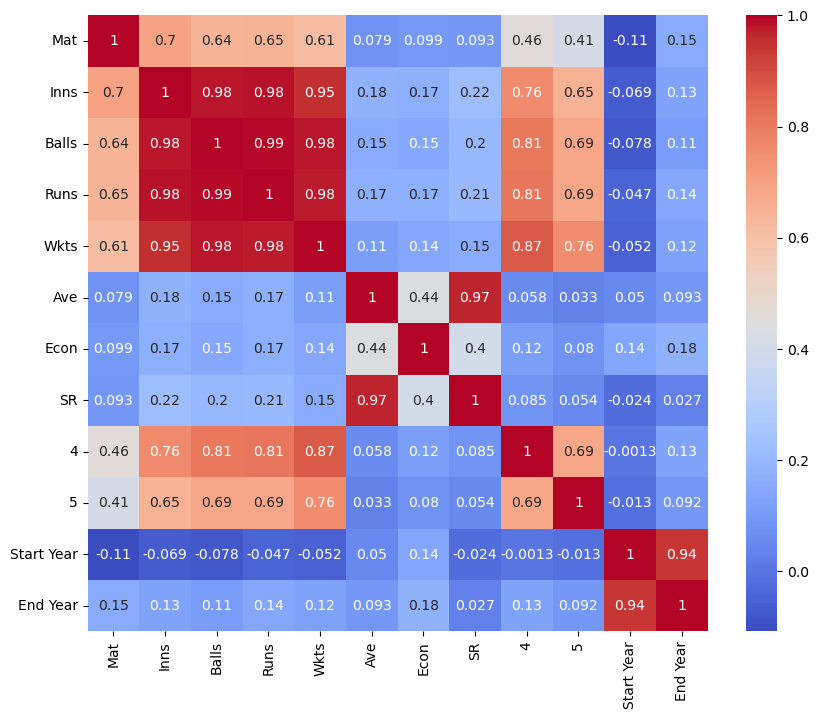

In [155]:
plt.figure(figsize = (10, 8))
sns.heatmap(bowling.corr(), annot = True, cmap="coolwarm")
plt.savefig('Correlation')
plt.show()

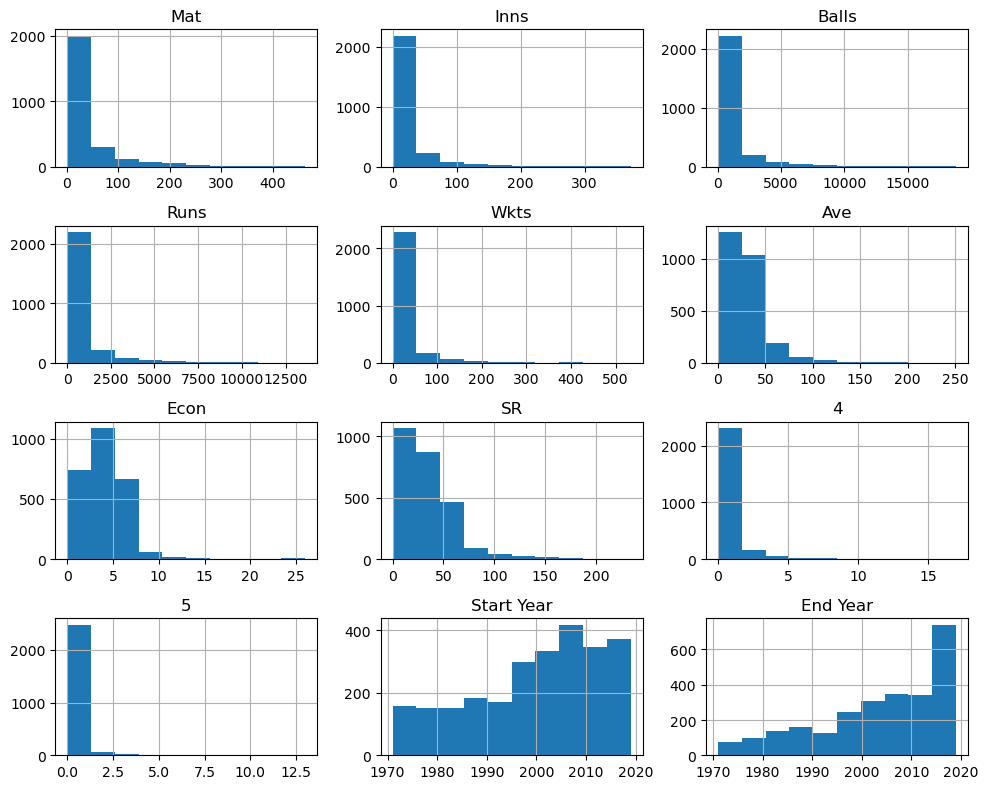

In [156]:
bowling.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

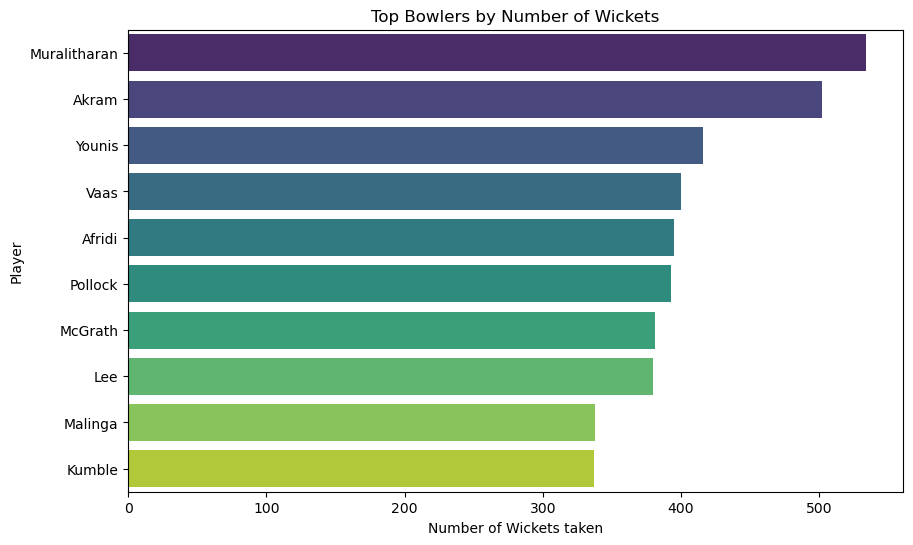

In [157]:
top = bowling.nlargest(10, 'Wkts')  
plt.figure(figsize=(10, 6))
sns.barplot(x='Wkts', y='Player', data=top, palette='viridis')
plt.xlabel('Number of Wickets taken')
plt.title('Top Bowlers by Number of Wickets')
plt.show()

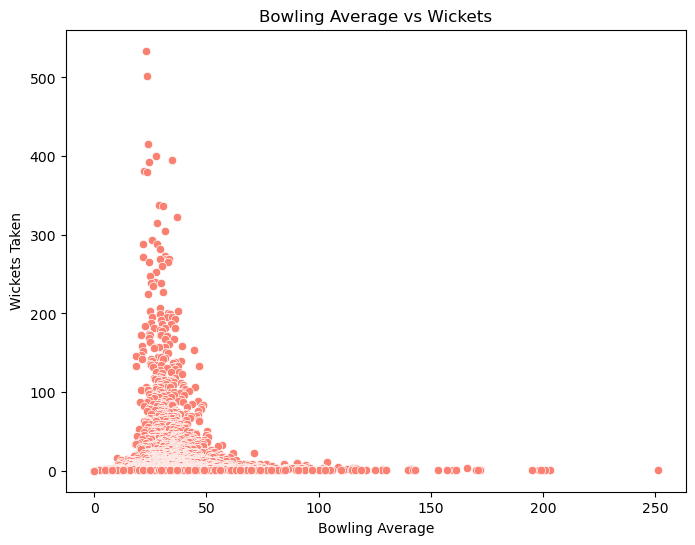

In [158]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ave', y='Wkts', data=bowling, color='salmon')
plt.xlabel('Bowling Average')
plt.ylabel('Wickets Taken')
plt.title('Bowling Average vs Wickets')
plt.show()

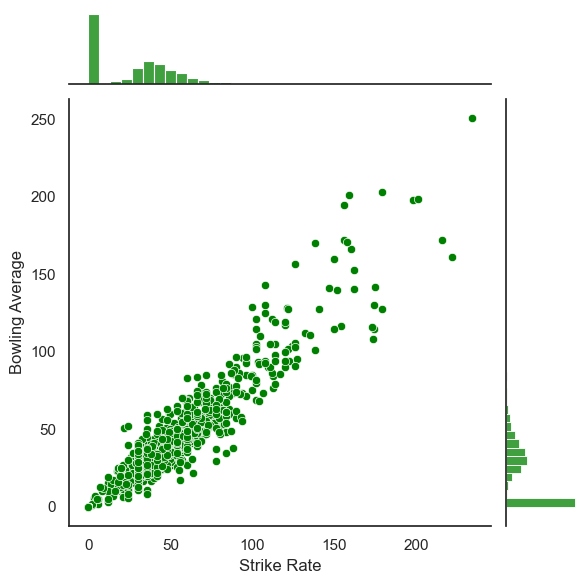

In [159]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='SR', y='Ave', data=bowling, kind='scatter', color='green')
plt.xlabel('Strike Rate')
plt.ylabel('Bowling Average')
plt.show()

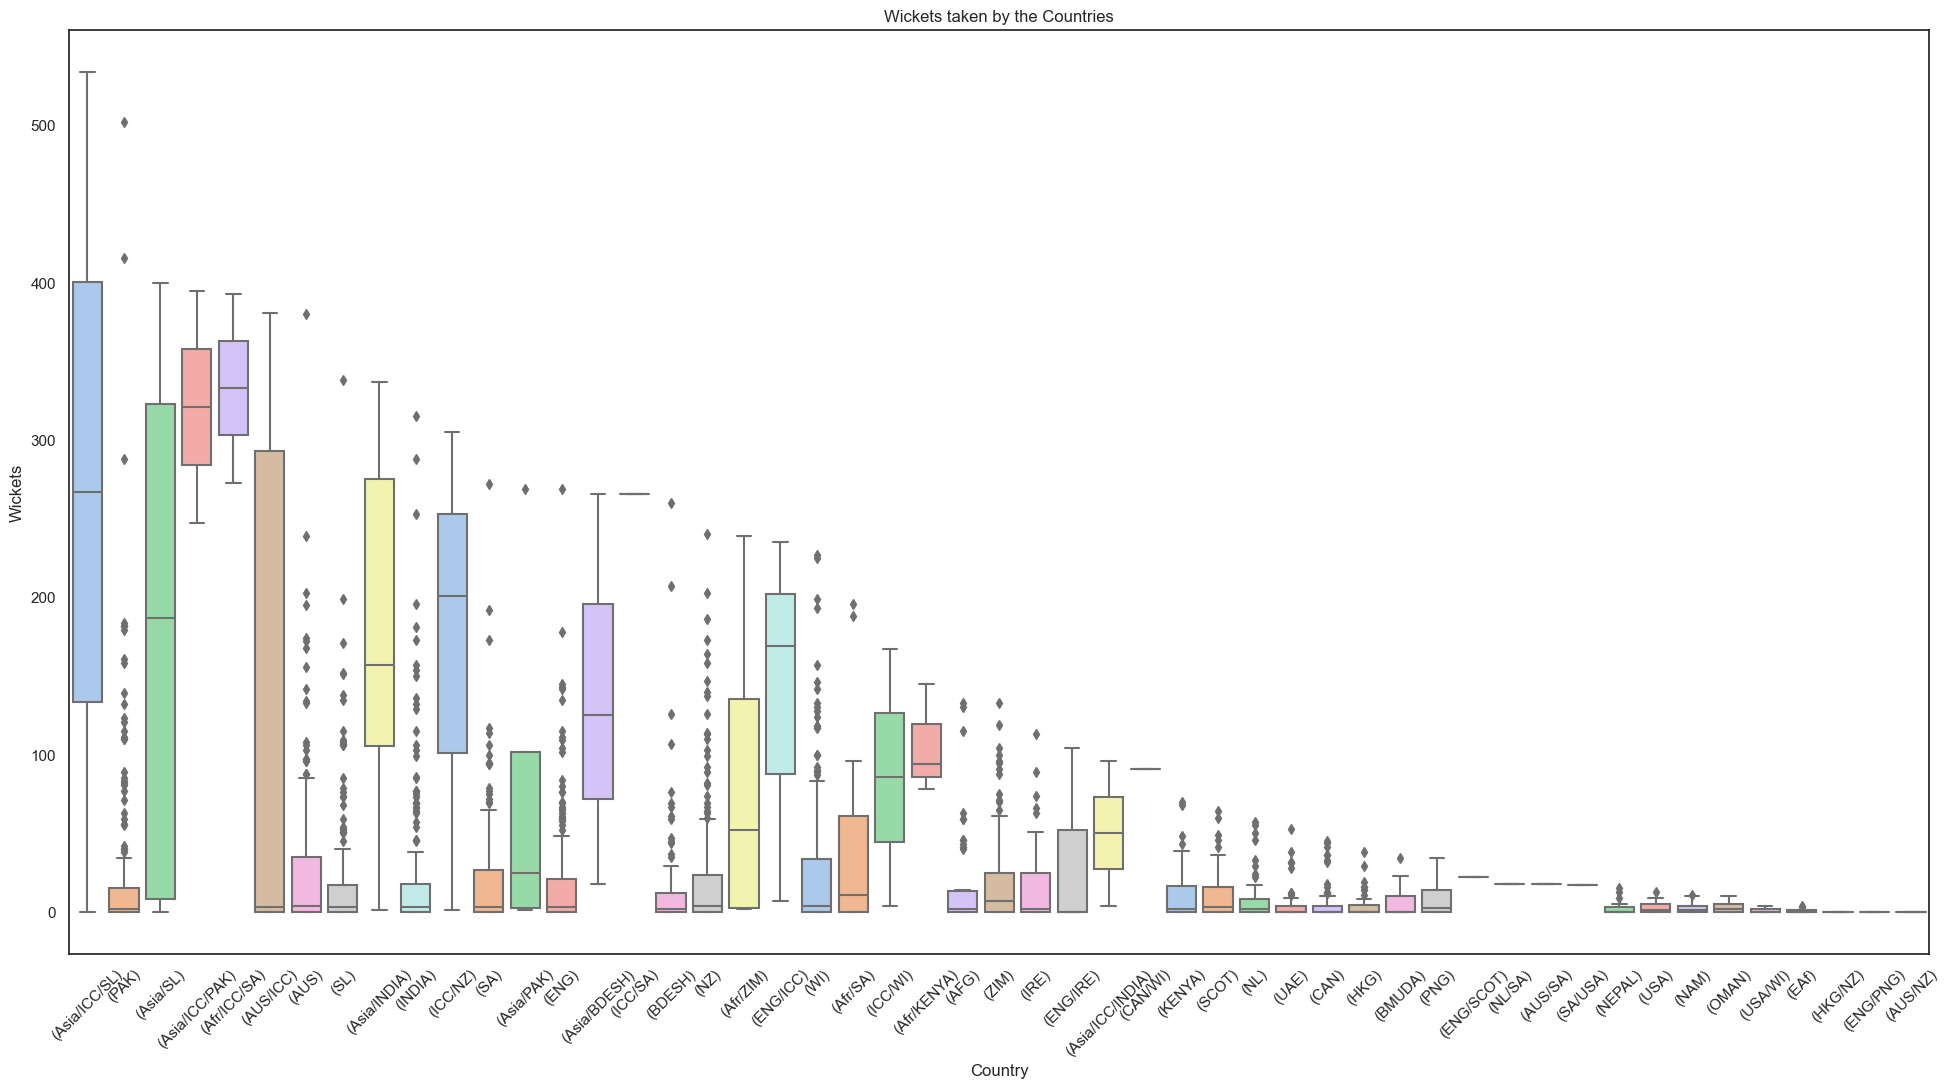

In [160]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='Country', y='Wkts', data=bowling, palette='pastel')
plt.xlabel('Country')
plt.ylabel('Wickets')
plt.title('Wickets taken by the Countries')
plt.xticks(rotation=45)
plt.show()

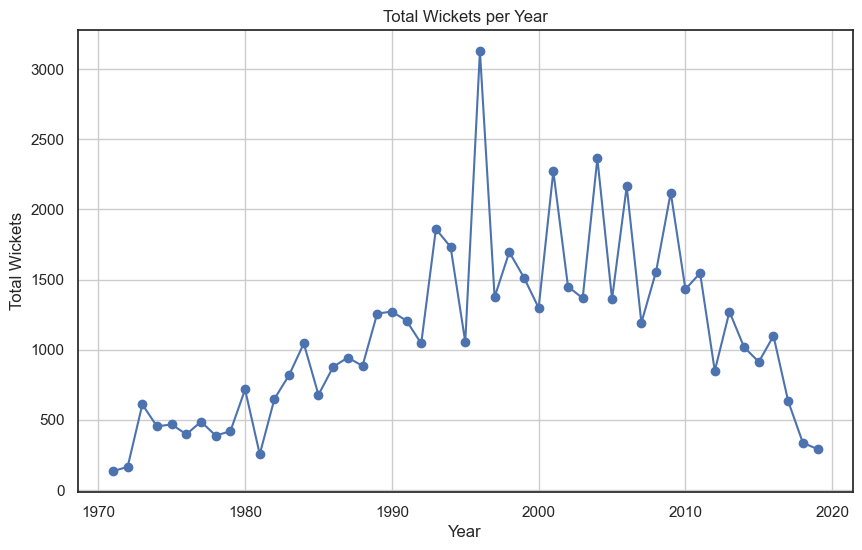

In [162]:
bowling['Start Year'] = pd.to_datetime(bowling['Start Year'], format='%Y')
wickets = bowling.groupby(bowling['Start Year'].dt.year)['Wkts'].sum()
plt.figure(figsize=(10, 6))
wickets.plot(marker='o', linestyle='-')
plt.title('Total Wickets per Year')
plt.xlabel('Year')
plt.ylabel('Total Wickets')
plt.grid(True)
plt.show()

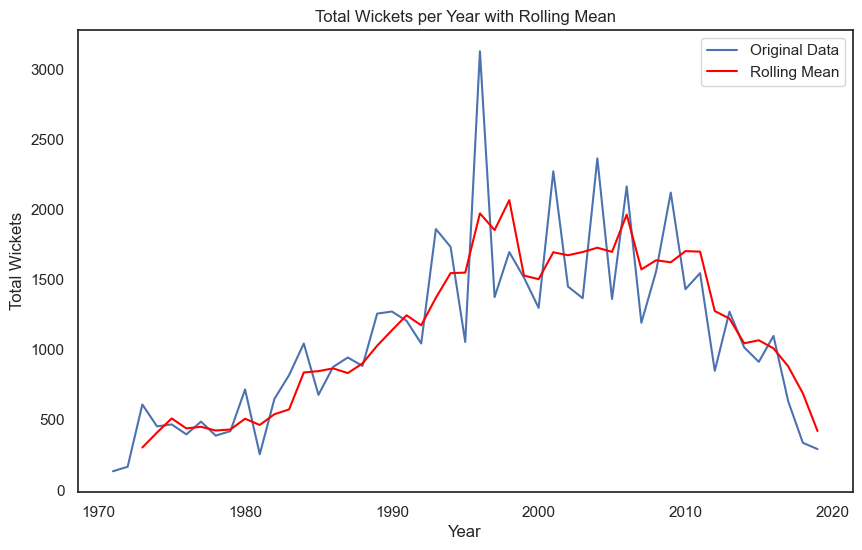

In [163]:
rolling = wickets.rolling(window=3).mean() 
plt.figure(figsize=(10, 6))
plt.plot(wickets, label='Original Data')
plt.plot(rolling, color='red', label='Rolling Mean')
plt.title('Total Wickets per Year with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Total Wickets')
plt.legend()
plt.show()

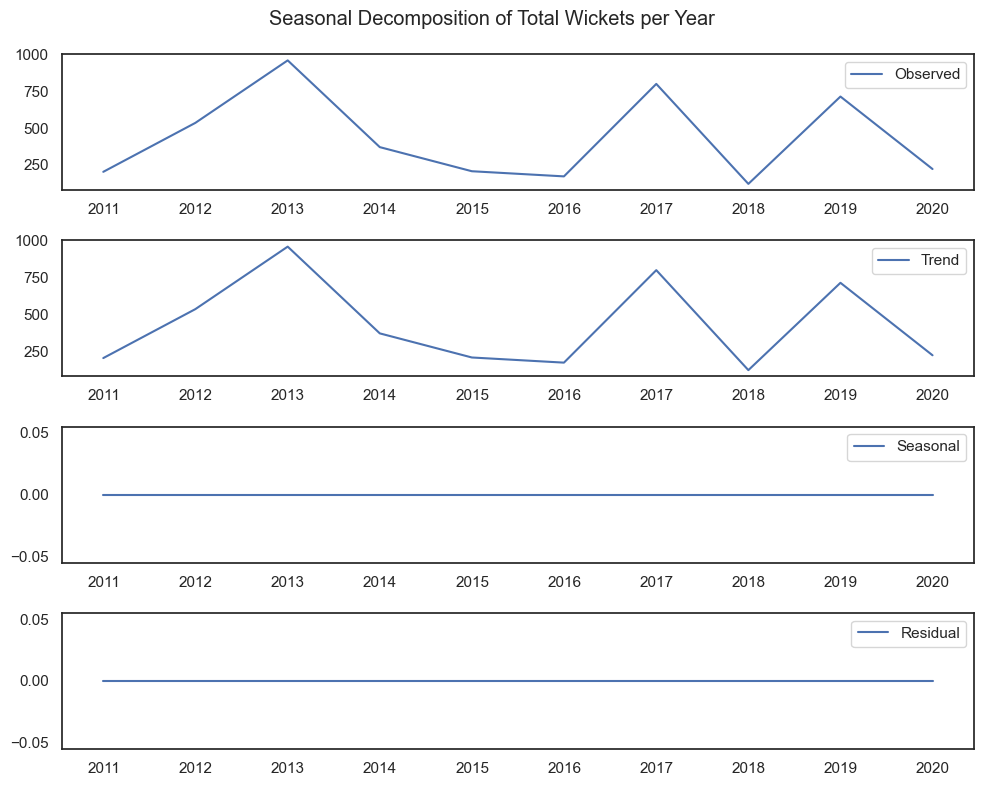

In [164]:
np.random.seed(42)
years = pd.date_range(start='01-01-2010', periods=10, freq='Y')
wickets = pd.Series(np.random.randint(100, 1000, size=len(years)), index=years)
decomposition = seasonal_decompose(wickets, model='additive', extrapolate_trend='freq')
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.suptitle('Seasonal Decomposition of Total Wickets per Year')
plt.tight_layout()
plt.show()

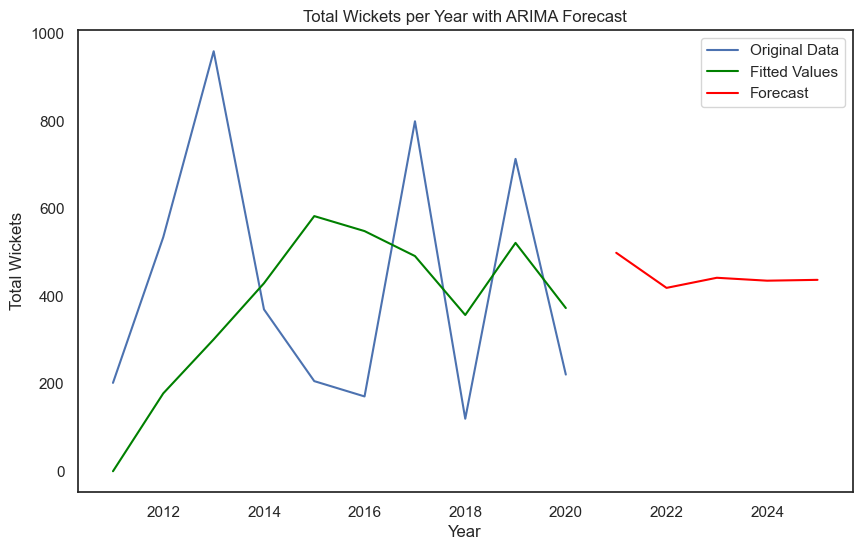

In [166]:
model = ARIMA(wickets, order=(1, 1, 1))  
fitted_model = model.fit()
forecast_steps = 5 
forecast = fitted_model.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(wickets, label='Original Data')
plt.plot(fitted_model.fittedvalues, color='green', label='Fitted Values')
plt.plot(fitted_model.forecast(steps=forecast_steps), color='red', label='Forecast')
plt.title('Total Wickets per Year with ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Total Wickets')
plt.legend()
plt.show()

## Hypothesis: Different countries tend to have different Economies 
In this case we fail to reject the null hypothesis, as it can be seen that there is no significant difference between the economies of different countries as the F-statistic is low indicating no variation between the groups and sicne P-value is higher suggesting not much difference between the economies.

In [167]:
countries = bowling['Country'].unique()  
grouped = [bowling[bowling['Country'] == country]['Econ'] for country in countries]
f_statistic, p_value = f_oneway(*grouped)
print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA results:
F-statistic: 1.1092098359851377
P-value: 0.2789434255900259


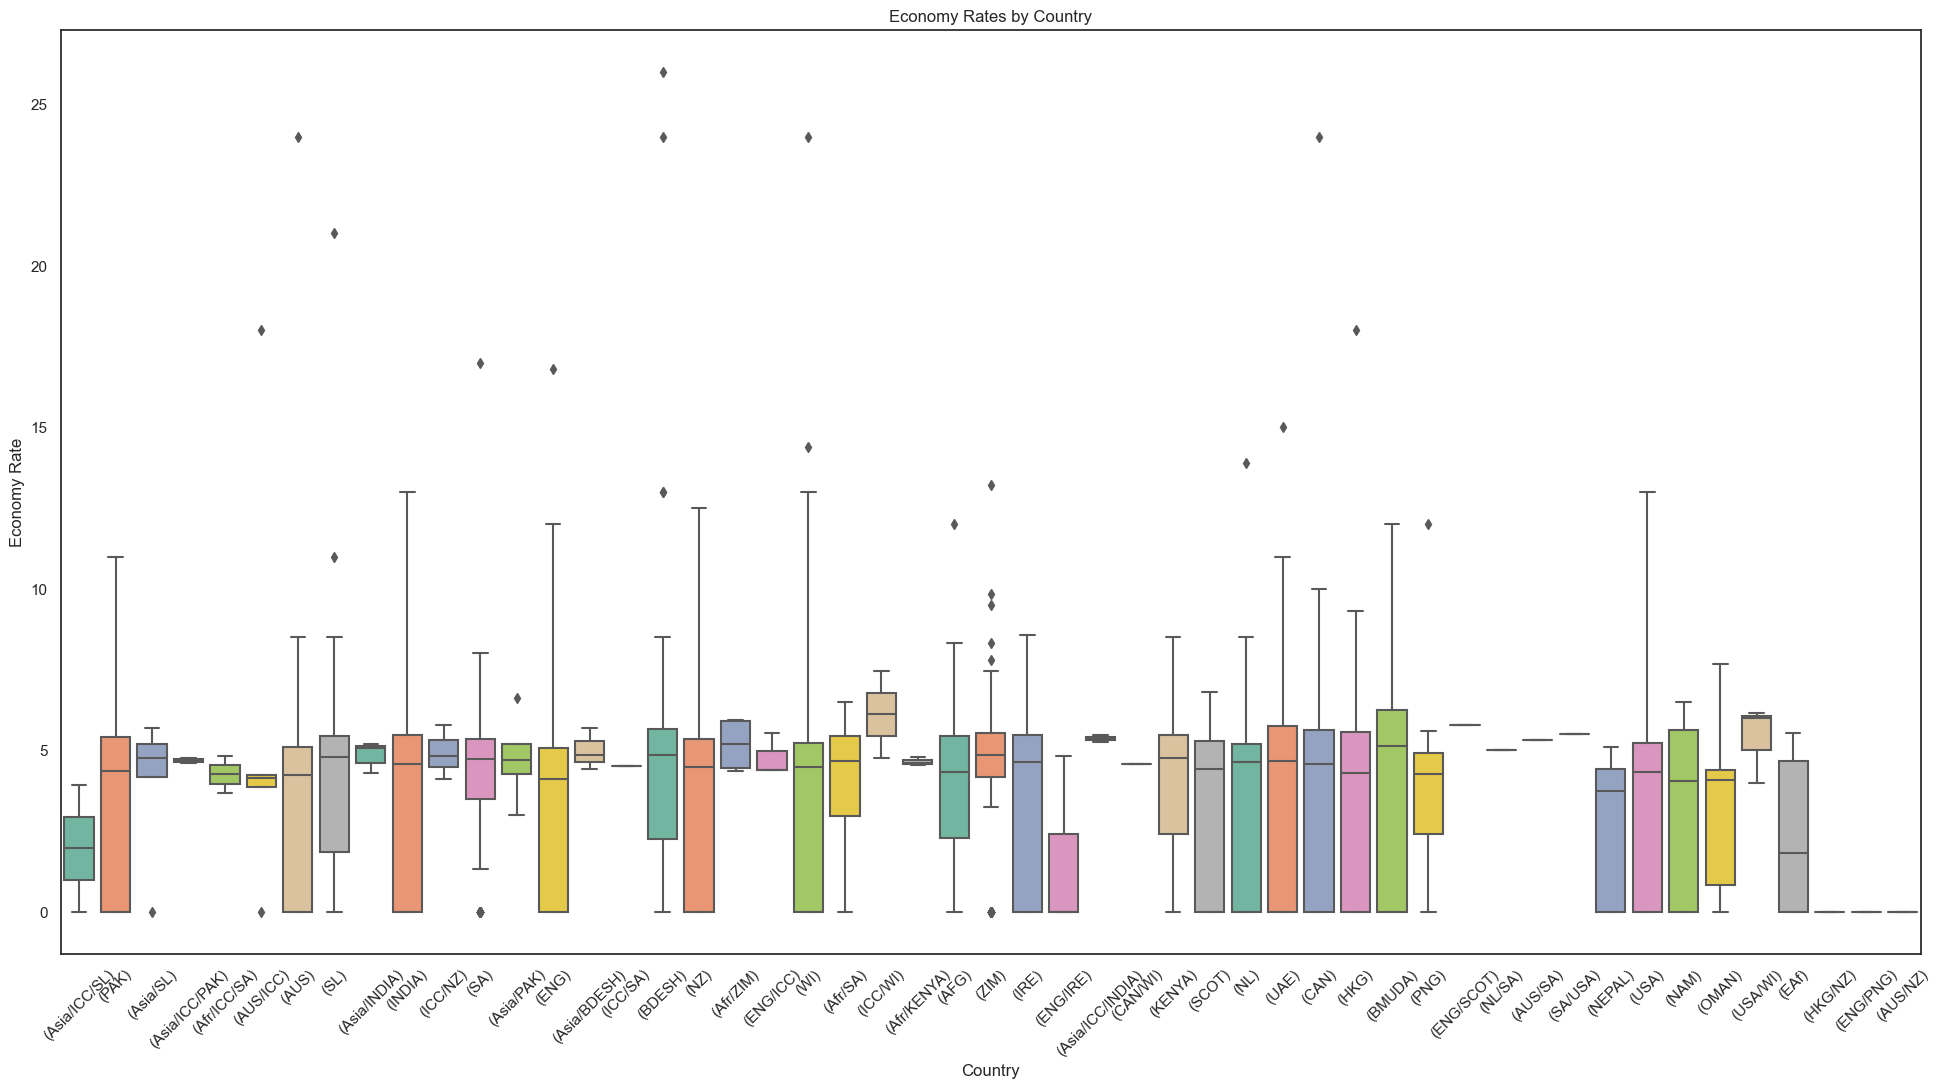

In [168]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='Country', y='Econ', data=bowling, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Economy Rate')
plt.title('Economy Rates by Country')
plt.xticks(rotation=45)
plt.show()


## Hypothesis: Bowling Averages are similar among different countries
By conducting the Anova Test, we found out that the F-statistic is low suggesting a lower variation between the groups and the P-value is higher meaning there is no significant difference in the bowling averages among the countries

In [169]:
countries = bowling['Country'].unique()
grouped = [bowling[bowling['Country'] == country]['Ave'].dropna() for country in countries]
f_statistic, p_value = f_oneway(*grouped)
print("Hypothesis 1: Performance by Country")
print(f"One-way ANOVA results for Bowling Average:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Hypothesis 1: Performance by Country
One-way ANOVA results for Bowling Average:
F-statistic: 1.0615778034454826
P-value: 0.35825004618253226


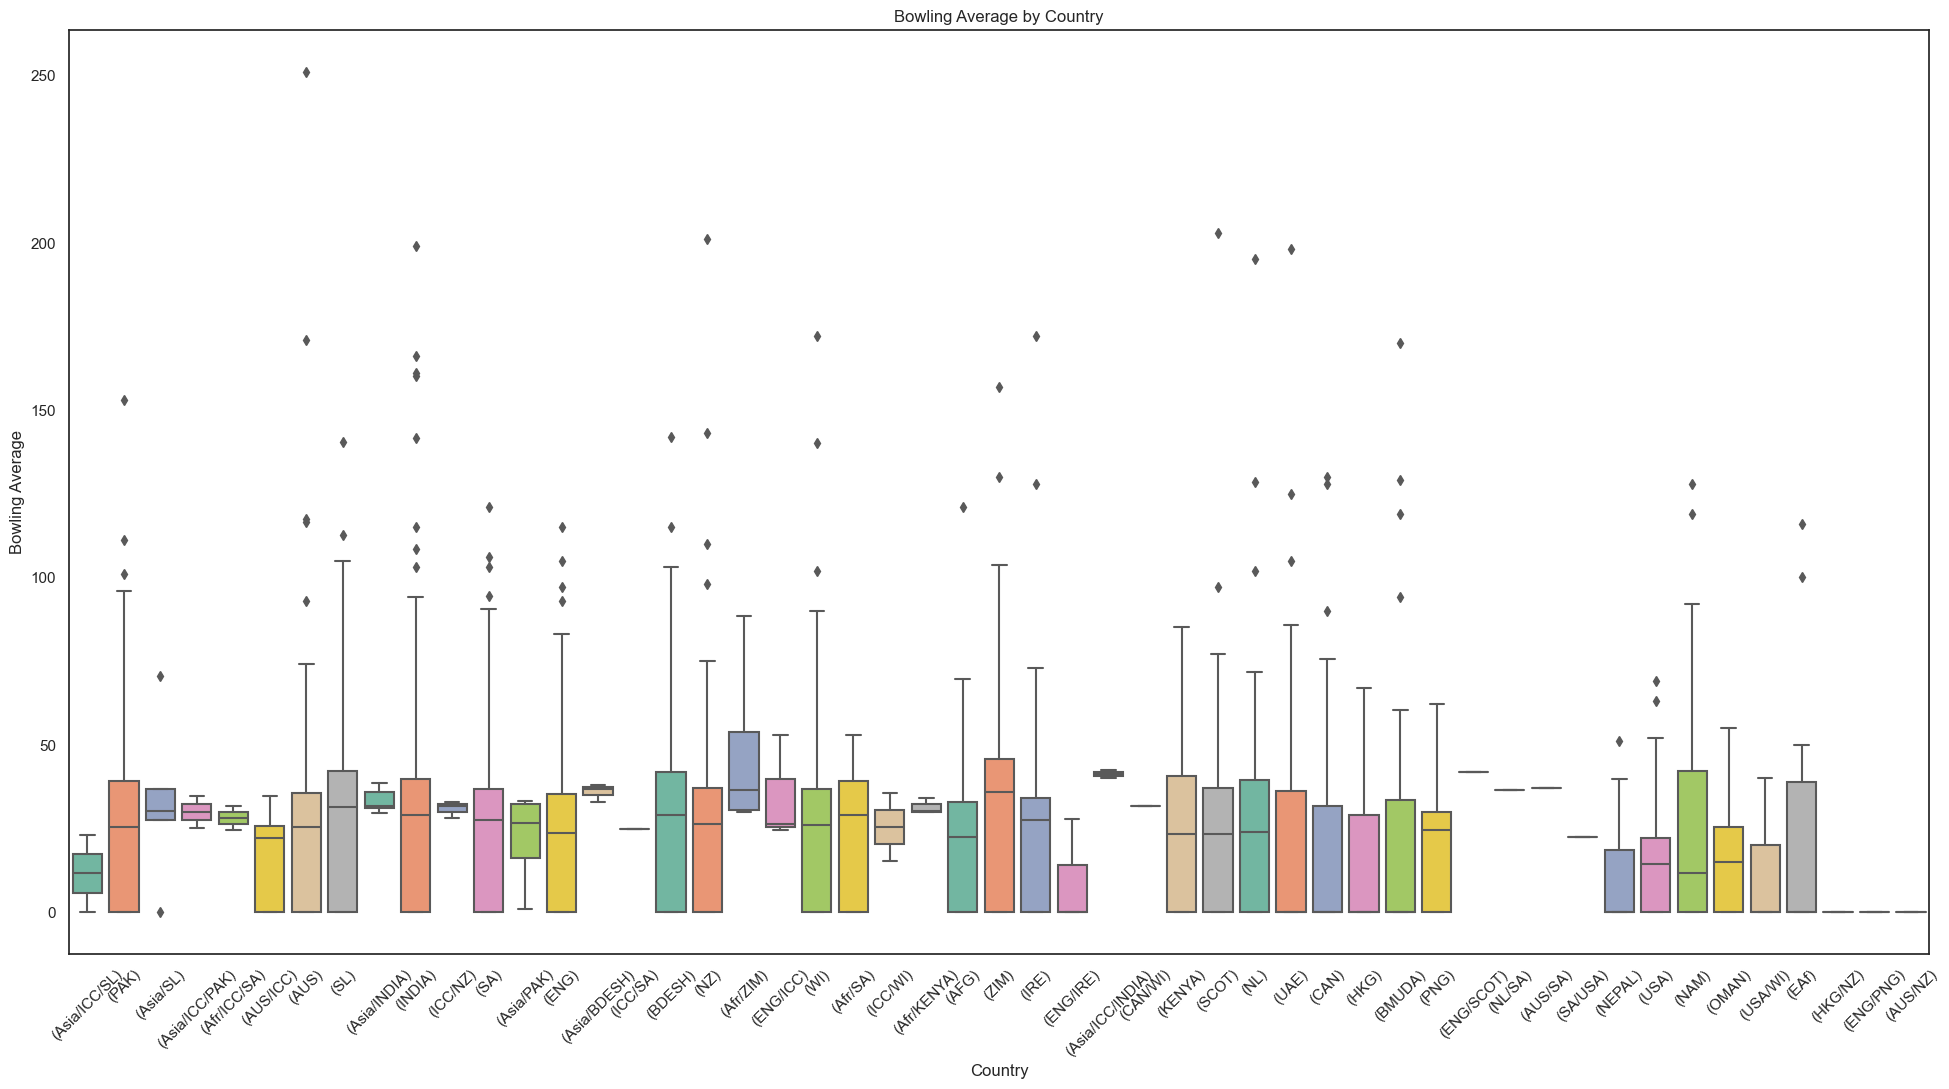

In [170]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='Country', y='Ave', data=bowling, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Bowling Average')
plt.title('Bowling Average by Country')
plt.xticks(rotation=45)
plt.show()

## Hypothesis: There is a consistent pattern in the Average after wickets taken.
There is a strong correlation as indicated by the Spearman correlation coefficient and P-value is 0 which suggests that as the number of wickets taken increases there a consistent trend in the bowling average. 

In [178]:
wickets = bowling['Wkts'].dropna()
bowling_average = bowling['Ave'].dropna()  
corr_wickets_avg, p_value = spearmanr(wickets, bowling_average)
print("\nHypothesis 3: Consistency")
print(f"Spearman's correlation coefficient: {corr_wickets_avg}")
print(f"P-value: {p_value}")


Hypothesis 3: Consistency
Spearman's correlation coefficient: 0.6815807956685936
P-value: 0.0


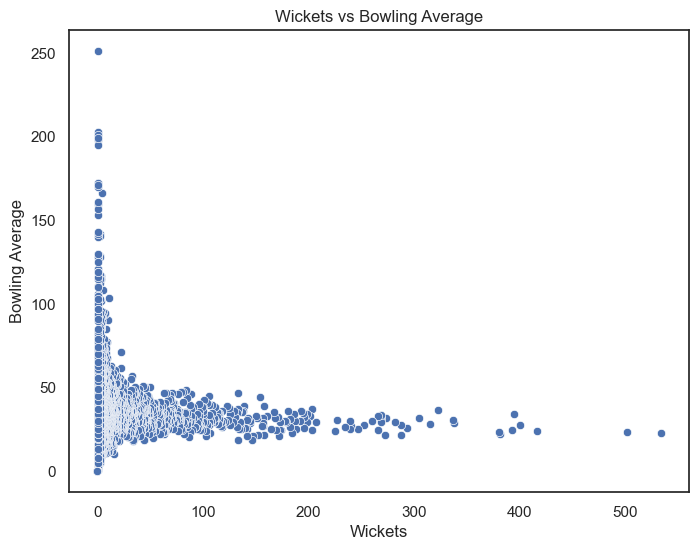

In [179]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wkts', y='Ave', data=bowling)
plt.xlabel('Wickets')
plt.ylabel('Bowling Average')
plt.title('Wickets vs Bowling Average')
plt.show()

# Combined Hypothesis of the two Datasets

## Hypothesis 1: Relationship between Batting Performance and Bowling Performance, there is a significant linear correlation between batting and bowling averages among countries
From the p-value we got below while performing Pearson correlation, we can say that the hypothesis can be rejected as the pearson correlation indicates a very weak linear relationship between batting and bowling averages. 


In [180]:
batting_avg = batting_data.groupby('Country')['Ave'].mean()
bowling_avg = bowling.groupby('Country')['Ave'].mean()
combined_avg = pd.merge(batting_avg, bowling_avg, on='Country', suffixes=('_batting', '_bowling'))
correlation, p_value = pearsonr(combined_avg['Ave_batting'], combined_avg['Ave_bowling'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.07847483651175173, P-value: 0.6041825199789497


In [181]:
f_statistic, p_value = f_oneway(batting_data['Ave'], bowling['Ave'])
print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic}, P-value: {p_value}")

One-way ANOVA results:
F-statistic: 121.20373098102534, P-value: 8.111176873822953e-28


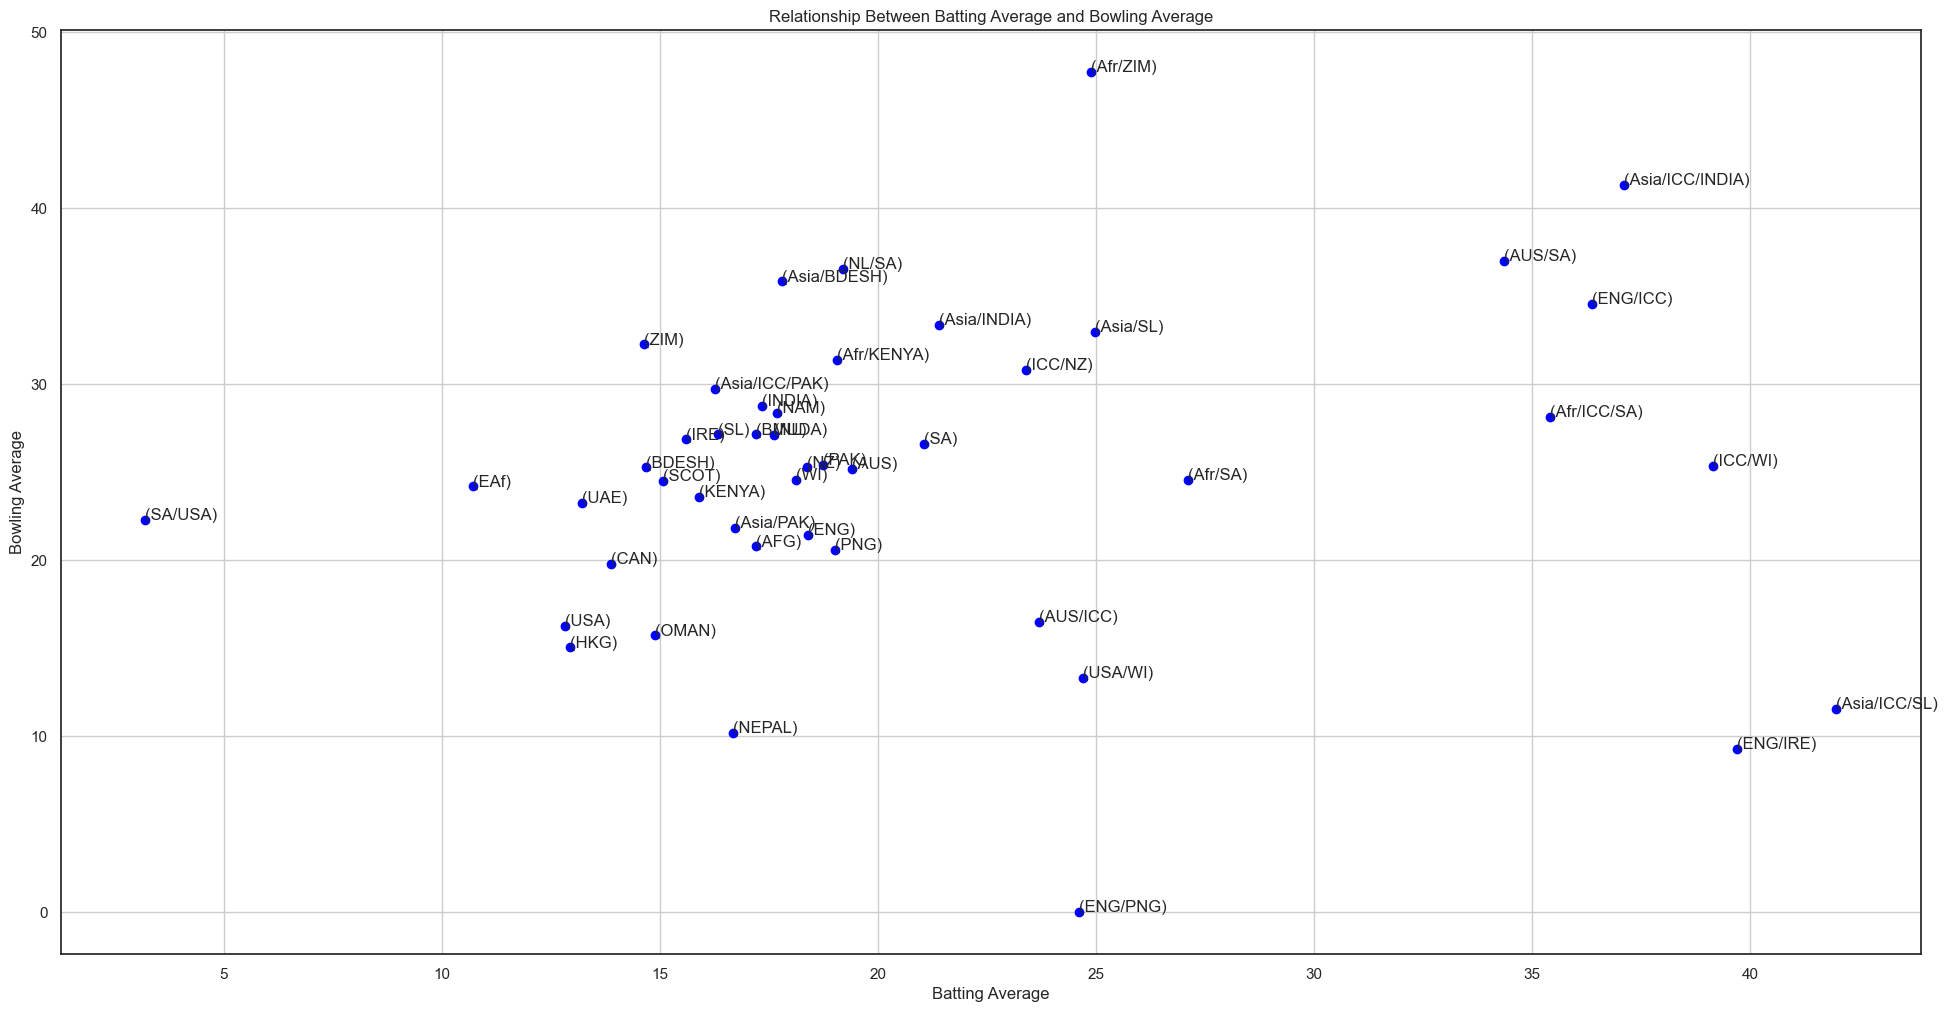

In [192]:
plt.figure(figsize=(24, 12))

plt.scatter(combined_avg['Ave_batting'], combined_avg['Ave_bowling'], color='blue')
plt.title('Relationship Between Batting Average and Bowling Average')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Average')

for i, txt in enumerate(combined_avg.index):
    plt.annotate(txt, (combined_avg['Ave_batting'][i], combined_avg['Ave_bowling'][i]))

plt.grid(True)
plt.show()


## Hypothesis 2: Impact of Time on Batting and Bowling Performance
There exists a strong positive linear relationship between mean runs scored and mean wickets taken across different years in the dataset. Given the strong positive correlation and the very low p-value, the hypothesis of a strong positive linear relationship between mean runs and mean wickets across different years can be accepted based on the statistical evidence provided by the Pearson correlation test.

In [183]:
mean_runs = batting_data.groupby('Strt')['Runs'].mean()
mean_wickets = bowling.groupby('Start Year')['Wkts'].mean()
correlation, p_value = pearsonr(mean_runs, mean_wickets)
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.7050474175237328, P-value: 1.5551925934829105e-08


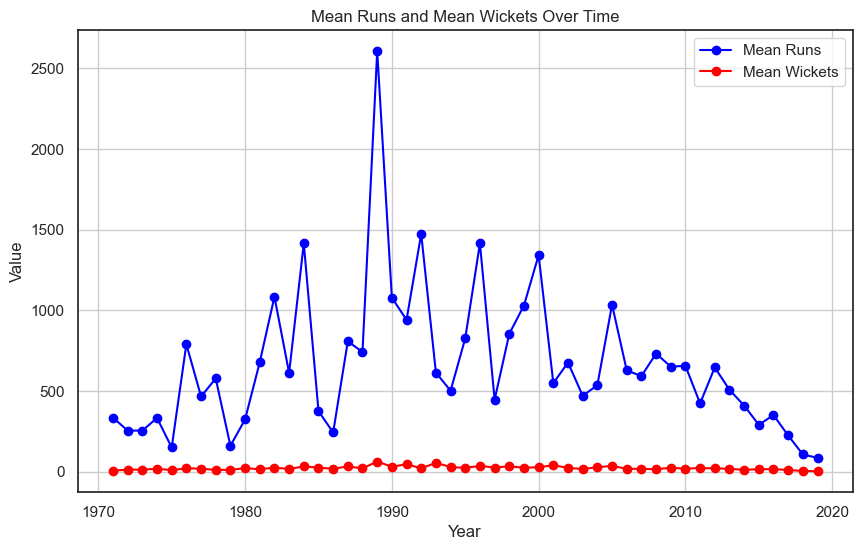

In [190]:
mean_runs = batting.groupby('Start Year')['Runs'].mean().reset_index()
mean_wickets = bowling.groupby('Start Year')['Wkts'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(mean_runs['Start Year'], mean_runs['Runs'], marker='o', linestyle='-', color='blue', label='Mean Runs')
plt.plot(mean_wickets['Start Year'], mean_wickets['Wkts'], marker='o', linestyle='-', color='red', label='Mean Wickets')
plt.title('Mean Runs and Mean Wickets Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Hypothesis 3: Performance Consistency with Increasing Wickets
There exists a moderate positive monotonic relationship between the number of times not out and batting average and wickets taken and bowling average. 

Based on the strong evidence provided by the very low p-values and the moderate to strong positive correlations in both batting and bowling performance metrics, the hypotheses of positive monotonic relationships between the specified performance metrics (not out/batting average, wickets taken/bowling average) can be accepted. These correlations suggest that as the number of times not out increases, batting average tends to increase monotonically, and as wickets taken increase, bowling average tends to increase monotonically.

In [184]:
corr_wickets_batting, p_value_batting = spearmanr(batting_data['NO'], batting_data['Ave'])
corr_wickets_bowling, p_value_bowling = spearmanr(bowling['Wkts'], bowling['Ave'])
print(f"Spearman's correlation coefficient (Batting): {corr_wickets_batting}, P-value: {p_value_batting}")
print(f"Spearman's correlation coefficient (Bowling): {corr_wickets_bowling}, P-value: {p_value_bowling}")

Spearman's correlation coefficient (Batting): 0.2844139231278563, P-value: 4.5166556284384405e-33
Spearman's correlation coefficient (Bowling): 0.6815807956685936, P-value: 0.0


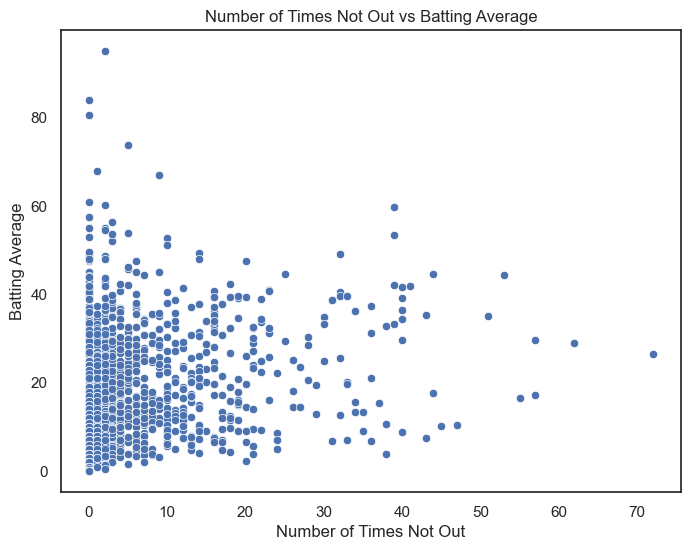

In [194]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO', y='Ave', data=batting_data)
plt.title('Number of Times Not Out vs Batting Average')
plt.xlabel('Number of Times Not Out')
plt.ylabel('Batting Average')
plt.show()

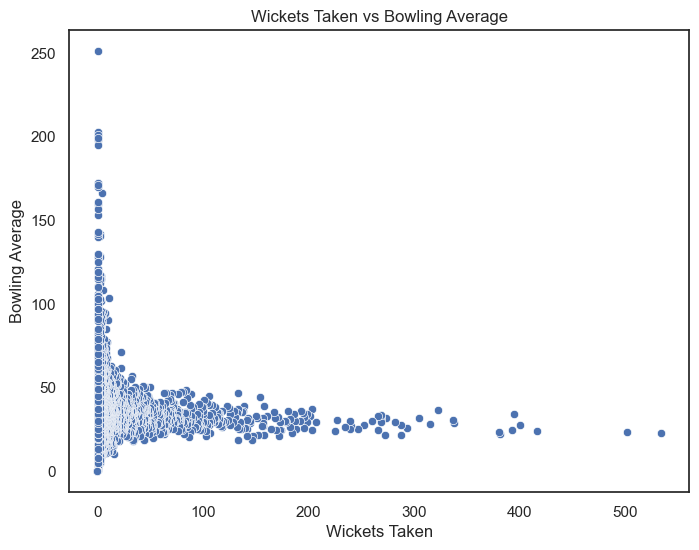

In [195]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wkts', y='Ave', data=bowling)
plt.title('Wickets Taken vs Bowling Average')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowling Average')
plt.show()